# Вводная часть - Измайлович Глеб

## Объяснение проекта и библиотек
    Я взялся за проект рекомендации лучших фильмов на основе пожеланий пользователя. До 2000 года.
   

### Объяснение
    Так как я понимал что давать рекомендации из разряда <вот это хорошая комедия>, не имеет статистически важных криетриев, то я решил поработать перед этим с данными для того что мои рекомендации были максимально корелляционно важными для пользователя.
    Я начал с того что изучил минимально библиотеку pandas, numpy для того чтобы найти и отработать датасеты с фильмами. Для чего? Потому что гораздо лучше на основе данных давать рекомендации которые точно могут пригодиться.
    Основные ссылки по изучению pandas.
    - https://pandas.pydata.org/docs/
    - https://www.youtube.com/c/GlebMikhaylov
    Также я использовал в ходе работы немного математической статистики, а именно брал процентили для утверждения погрешностей в данных. Сами 2 датасета которые я взял за основу можно найти по данным ссылкам
    - https://www.kaggle.com/datasets/rishidamarla/films-dataset
    - https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores
    Я изучил их, обратал пропуски и дубликаты, выбрал 10 наиболее популярных жанров и приступил к написанию чат-бота
    Само собой этот датасет я не могу скинуть сюда напрямую, поэтому я просто буду копировать столбцы как столбцы Series
   

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy

#### Если по какой-то причине у вас отсутсвуют данные библиотеки - то чтобы скачать их, раскоментируйте строки ниже

In [2]:
# ! pip install pandas
# ! pip install numpy 

    Библиотека пандас нужна для того чтобы мы могли напрямую работать с нашим датасетом
    Библиотека numpy только для процентилей
    Взяли мы из либы копи дипкопи, чтобы не портить датасет и не перезапускать все ячейки в случае провальной работы пользователя

In [3]:
col_year = [1990, 1991, 1983, 1979, 1978, 1983, 1984, 1989, 1985, 1990, 1982, 1982, 1966, 1986, 1966, 1985, 1976, 1929, 1963, 1988, 1988, 1981, 1987, 1991, 1988, 1990, 1988, 1989, 1979, 1960, 1957, 1956, 1955, 1955, 1962, 1972, 1958, 1967, 1979, 1983, 1966, 1966, 1986, 1965, 1984, 1988, 1978, 1992, 1978, 1992, 1987, 1992, 1981, 1992, 1924, 1988, 1991, 1986, 1985, 1985, 1971, 1959, 1926, 1987, 1988, 1926, 1988, 1974, 1977, 1988, 1989, 1996, 1992, 1980, 1988, 1982, 1987, 1971, 1957, 1969, 1958, 1959, 1967, 1964, 1965, 1962, 1964, 1958, 1955, 1957, 1973, 1987, 1932, 1987, 1982, 1992, 1988, 1989, 1987, 1982, 1992, 1983, 1986, 1986, 1991, 1990, 1946, 1984, 1988, 1988, 1990, 1942, 1972, 1977, 1990, 1948, 1945, 1988, 1982, 1975, 1971, 1970, 1972, 1935, 1978, 1944, 1958, 1941, 1948, 1982, 1969, 1949, 1946, 1940, 1961, 1956, 1945, 1937, 1938, 1935, 1939, 1938, 1956, 1952, 1953, 1954, 1950, 1969, 1987, 1982, 1991, 1970, 1982, 1984, 1973, 1988, 1972, 1970, 1973, 1952, 1976, 1969, 1991, 1974, 1964, 1977, 1942, 1968, 1973, 1982, 1990, 1987, 1985, 1974, 1958, 1981, 1992, 1985, 1990, 1973, 1986, 1990, 1948, 1987, 1965, 1980, 1988, 1978, 1988, 1988, 1973, 1982, 1989, 1990, 1971, 1983, 1989, 1987, 1984, 1984, 1989, 1963, 1935, 1988, 1974, 1977, 1983, 1936, 1972, 1987, 1990, 1982, 1977, 1989, 1943, 1992, 1989, 1987, 1987, 1979, 1984, 1989, 1975, 1985, 1965, 1963, 1931, 1931, 1967, 1968, 1989, 1987, 1980, 1988, 1990, 1991, 1987, 1948, 1962, 1989, 1992, 1966, 1986, 1991, 1961, 1962, 1989, 1991, 1989, 1992, 1977, 1987, 1988, 1954, 1957, 1986, 1979, 1989, 1990, 1980, 1990, 1971, 1969, 1948, 1965, 1946, 1939, 1950, 1986, 1990, 1988, 1989, 1956, 1992, 1940, 1949, 1986, 1975, 1942, 1989, 1990, 1967, 1992, 1983, 1980, 1986, 1983, 1981, 1980, 1986, 1989, 1990, 1989, 1988, 1981, 1989, 1940, 1961, 1987, 1991, 1987, 1991, 1979, 1991, 1991, 1946, 1950, 1949, 1985, 1986, 1992, 1976, 1974, 1975, 1977, 1987, 1947, 1974, 1981, 1980, 1945, 1979, 1970, 1984, 1991, 1961, 1966, 1974, 1985, 1967, 1992, 1987, 1987, 1956, 1985, 1984, 1992, 1986, 1979, 1986, 1981, 1936, 1978, 1990, 1992, 1988, 1987, 1984, 1991, 1977, 1981, 1979, 1989, 1989, 1980, 1977, 1983, 1991, 1956, 1957, 1990, 1972, 1979, 1986, 1971, 1979, 1965, 1940, 1944, 1973, 1992, 1989, 1990, 1983, 1991, 1988, 1972, 1989, 1987, 1934, 1931, 1930, 1926, 1928, 1935, 1936, 1931, 1929, 1932, 1931, 1939, 1933, 1928, 1925, 1929, 1962, 1982, 1989, 1953, 1979, 1975, 1987, 1989, 1975, 1979, 1986, 1959, 1954, 1961, 1983, 1988, 1987, 1978, 1988, 1966, 1964, 1979, 1986, 1990, 1988, 1992, 1988, 1991, 1984, 1986, 1991, 1992, 1985, 1983, 1984, 1987, 1982, 1987, 1938, 1936, 1976, 1988, 1983, 1987, 1989, 1991, 1986, 1989, 1970, 1984, 1978, 1982, 1972, 1987, 1974, 1992, 1986, 1984, 1980, 1974, 1980, 1931, 1972, 1964, 1952, 1948, 1940, 1946, 1948, 1990, 1964, 1987, 1984, 1985, 1949, 1964, 1960, 1976, 1961, 1956, 1952, 1968, 1991, 1967, 1957, 1975, 1981, 1992, 1986, 1987, 1988, 1988, 1966, 1986, 1989, 1943, 1992, 1987, 1980, 1973, 1987, 1947, 1928, 1986, 1987, 1934, 1950, 1991, 1987, 1989, 1980, 1982, 1980, 1940, 1987, 1989, 1992, 1932, 1991, 1990, 1980, 1988, 1982, 1987, 1973, 1970, 1988, 1986, 1955, 1989, 1981, 1927, 1991, 1983, 1987, 1986, 1963, 1988, 1948, 1973, 1983, 1975, 1990, 1977, 1955, 1988, 1983, 1989, 1991, 1977, 1979, 1981, 1986, 1977, 1972, 1974, 1976, 1972, 1970, 1980, 1977, 1977, 1972, 1953, 1955, 1954, 1945, 1939, 1956, 1989, 1992, 1927, 1978, 1987, 1970, 1989, 1990, 1987, 1984, 1984, 1987, 1989, 1987, 1986, 1969, 1984, 1935, 1990, 1986, 1977, 1989, 1987, 1989, 1987, 1990, 1986, 1953, 1969, 1988, 1981, 1988, 1990, 1985, 1986, 1987, 1983, 1983, 1990, 1989, 1990, 1992, 1949, 1978, 1971, 1990, 1960, 1957, 1987, 1951, 1986, 1971, 1985, 1989, 1978, 1974, 1977, 1986, 1938, 1987, 1959, 1929, 1941, 1986, 1982, 1987, 1991, 1991, 1960, 1961, 1954, 1963, 1957, 1978, 1964, 1961, 1958, 1953, 1977, 1977, 1979, 1986, 1979, 1943, 1986, 1991, 1962, 1989, 1990, 1988, 1979, 1983, 1967, 1990, 1970, 1939, 1992, 1988, 1986, 1990, 1974, 1988, 1980, 1981, 1989, 1955, 1986, 1977, 1991, 1992, 1986, 1986, 1989, 1980, 1989, 1990, 1992, 1967, 1990, 1987, 1988, 1975, 1988, 1991, 1988, 1989, 1983, 1986, 1985, 1984, 1983, 1965, 1989, 1981, 1957, 1964, 1975, 1988, 1990, 1991, 1991, 1970, 1973, 1962, 1989, 1988, 1960, 1972, 1981, 1976, 1977, 1989, 1980, 1991, 1950, 1992, 1953, 1991, 1987, 1986, 1989, 1984, 1990, 1986, 1982, 1948, 1952, 1974, 1970, 1955, 1968, 1976, 1987, 1988, 1974, 1941, 1990, 1940, 1955, 1987, 1963, 1987, 1956, 1970, 1991, 1923, 1980, 1991, 1989, 1991, 1986, 1987, 1950, 1958, 1987, 1946, 1941, 1940, 1941, 1992, 1950, 1957, 1939, 1971, 1983, 1952, 1969, 1953, 1929, 1978, 1981, 1986, 1982, 1985, 1955, 1969, 1987, 1969, 1991, 1993, 1988, 1976, 1986, 1984, 1990, 1986, 1984, 1986, 1978, 1989, 1979, 1986, 1982, 1989, 1989, 1985, 1991, 1988, 1971, 1973, 1988, 1927, 1989, 1990, 1962, 1992, 1991, 1988, 1990, 1962, 1972, 1965, 1965, 1983, 1988, 1990, 1988, 1988, 1989, 1987, 1970, 1990, 1991, 1987, 1987, 1989, 1949, 1974, 1989, 1988, 1986, 1991, 1977, 1971, 1984, 1990, 1986, 1985, 1987, 1991, 1969, 1986, 1943, 1986, 1987, 1990, 1991, 1991, 1940, 1990, 1986, 1992, 1951, 1979, 1991, 1980, 1969, 1968, 1980, 1986, 1976, 1988, 1992, 1988, 1992, 1991, 1958, 1988, 1947, 1990, 1988, 1991, 1988, 1987, 1988, 1990, 1991, 1990, 1972, 1991, 1966, 1992, 1982, 1985, 1971, 1974, 1973, 1968, 1970, 1971, 1986, 1986, 1984, 1989, 1975, 1968, 1991, 1975, 1973, 1987, 1924, 1966, 1986, 1972, 1986, 1983, 1986, 1971, 1988, 1981, 1976, 1988, 1936, 1977, 1954, 1960, 1955, 1992, 1988, 1963, 1987, 1986, 1987, 1965, 1988, 1988, 1978, 1986, 1985, 1990, 1986, 1985, 1964, 1982, 1989, 1987, 1933, 1992, 1985, 1986, 1981, 1967, 1992, 1990, 1987, 1992, 1967, 1987, 1991, 1978, 1984, 1986, 1983, 1982, 1985, 1981, 1985, 1988, 1989, 1992, 1970, 1987, 1983, 1968, 1990, 1970, 1941, 1984, 1949, 1989, 1983, 1957, 1975, 1967, 1972, 1968, 1963, 1992, 1977, 1956, 1985, 1943, 1931, 1992, 1988, 1991, 1935, 1988, 1980, 1948, 1937, 1987, 1988, 1983, 1987, 1990, 1985, 1963, 1963, 1959, 1961, 1986, 1989, 1986, 1941, 1939, 1940, 1986, 1985, 1983, 1984, 1985, 1984, 1988, 1986, 1968, 1966, 1968, 1969, 1984, 1957, 1985, 1990, 1959, 1970, 1971, 1981, 1967, 1988, 1990, 1991, 1986, 1991, 1988, 1986, 1992, 1997, 1979, 1985, 1984, 1973, 1974, 1972, 1966, 1967, 1977, 1969, 1975, 1968, 1973, 1988, 1987, 1966, 1990, 1987, 1970, 1989, 1990, 1987, 1989, 1974, 1973, 1953, 1980, 1989, 1956, 1973, 1989, 1992, 1982, 1987, 1986, 1970, 1965, 1955, 1977, 1968, 1992, 1985, 1991, 1956, 1979, 1955, 1961, 1970, 1966, 1966, 1987, 1989, 1968, 1961, 1991, 1943, 1950, 1950, 1947, 1975, 1949, 1987, 1947, 1990, 1953, 1954, 1977, 1979, 1954, 1987, 1966, 1986, 1988, 1986, 1988, 1981, 1991, 1987, 1962, 1983, 1989, 1991, 1963, 1961, 1937, 1987, 1936, 1991, 1931, 1979, 1984, 1979, 1990, 1963, 1963, 1975, 1986, 1991, 1979, 1987, 1986, 1989, 1990, 1984, 1974, 1975, 1982, 1987, 1966, 1990, 1991, 1949, 1949, 1949, 1950, 1948, 1948, 1948, 1968, 1983, 1971, 1985, 1961, 1983, 1984, 1958, 1982, 1989, 1988, 1953, 1960, 1966, 1966, 1970, 1953, 1935, 1969, 1930, 1954, 1937, 1976, 1981, 1982, 1975, 1981, 1989, 1990, 1985, 1986, 1984, 1992, 1979, 1983, 1971, 1945, 1952, 1990, 1937, 1974, 1971, 1943, 1991, 1946, 1960, 1951, 1951, 1962, 1955, 1957, 1961, 1980, 1952, 1987, 1926, 1946, 1920, 1954, 1928, 1933, 1991, 1990, 1989, 1989, 1982, 1974, 1987, 1945, 1969, 1964, 1976, 1984, 1988, 1978, 1955, 1957, 1971, 1984, 1991, 1970, 1940, 1967, 1980, 1970, 1990, 1966, 1973, 1942, 1991, 1982, 1987, 1989, 1973, 1987, 1971, 1970, 1988, 1981, 1935, 1988, 1990, 1989, 1987, 1976, 1987, 1969, 1988, 1988, 1975, 1972, 1970, 1973, 1989, 1979, 1983, 1986, 1951, 1985, 1980, 1972, 1983, 1984, 1991, 1987, 1990, 1990, 1972, 1985, 1969, 1985, 1976, 1987, 1991, 1938, 1938, 1982, 1971, 1979, 1948, 1990, 1993, 1991, 1924, 1986, 1963, 1971, 1971, 1985, 1938, 1982, 1947, 1947, 1937, 1992, 1947, 1947, 1949, 1992, 1937, 1937, 1949, 1991, 1957, 1953, 1982, 1960, 1986, 1985, 1990, 1952, 1976, 1990, 1982, 1956]
col_runtime = [111, 113, 104, 122, 94, 140, 101, 99, 104, 149, 188, 117, 103, 112, 103, 112, 150, 84, 109, 110, 101, 116, 101, 105, 127, 97, 108, 88, 110, 90, 91, 96, 86, 95, 91, 91, 104, 130, 121, 118, 190, 125, 107, 172, 140, 104, 106, 286, 108, 95, 120, 117, 106, 97, 110, 118, 115, 108, 97, 104, 102, 91, 126, 102, 141, 66, 103, 128, 136, 100, 103, 96, 100, 124, 90, 120, 100, 101, 99, 86, 77, 90, 100, 102, 100, 134, 99, 90, 90, 90, 87, 97, 92, 104, 115, 101, 83, 126, 95, 101, 125, 134, 117, 108, 116, 123, 93, 95, 96, 96, 127, 123, 100, 102, 105, 99, 103, 76, 188, 120, 96, 126, 90, 75, 97, 114, 100, 75, 100, 195, 98, 117, 101, 90, 120, 106, 126, 91, 104, 90, 87, 74, 98, 110, 83, 81, 107, 103, 91, 128, 91, 94, 108, 158, 101, 172, 124, 137, 116, 107, 116, 94, 98, 144, 112, 117, 88, 103, 105, 123, 102, 98, 105, 89, 101, 129, 106, 119, 121, 129, 101, 135, 110, 91, 123, 104, 120, 114, 117, 90, 122, 94, 114, 102, 98, 50, 80, 91, 94, 99, 125, 138, 64, 103, 313, 104, 104, 84, 71, 119, 107, 92, 91, 90, 99, 99, 113, 103, 119, 128, 106, 90, 109, 111, 122, 120, 68, 110, 111, 103, 91, 118, 91, 119, 111, 119, 101, 81, 91, 108, 135, 99, 88, 96, 66, 110, 90, 95, 103, 60, 123, 109, 108, 96, 82, 120, 122, 97, 106, 90, 94, 74, 128, 103, 133, 110, 96, 138, 96, 89, 93, 104, 120, 90, 120, 115, 120, 89, 85, 120, 93, 90, 86, 99, 103, 108, 114, 135, 135, 120, 127, 125, 113, 103, 94, 89, 83, 190, 130, 158, 118, 99, 110, 110, 102, 97, 86, 93, 90, 87, 85, 116, 131, 117, 134, 97, 118, 117, 117, 144, 91, 92, 123, 105, 86, 140, 103, 127, 96, 103, 97, 94, 94, 101, 84, 85, 108, 103, 115, 95, 96, 70, 450, 103, 90, 95, 95, 112, 106, 113, 116, 110, 118, 101, 124, 121, 132, 104, 99, 120, 89, 129, 122, 100, 114, 113, 97, 130, 96, 87, 85, 83, 94, 95, 118, 98, 92, 103, 92, 85, 74, 92, 109, 90, 96, 110, 91, 100, 112, 84, 108, 97, 96, 125, 74, 105, 116, 86, 120, 120, 124, 93, 120, 111, 89, 122, 102, 108, 134, 109, 100, 102, 117, 134, 95, 51, 180, 120, 126, 115, 133, 99, 136, 108, 105, 186, 99, 100, 82, 93, 107, 117, 126, 298, 89, 99, 88, 93, 96, 87, 96, 110, 104, 94, 100, 112, 109, 109, 112, 103, 102, 106, 100, 102, 109, 110, 95, 78, 132, 98, 87, 81, 110, 98, 105, 130, 85, 90, 95, 84, 170, 123, 106, 109, 121, 95, 134, 132, 108, 153, 107, 109, 95, 114, 112, 163, 87, 120, 90, 83, 265, 88, 95, 99, 102, 94, 56, 148, 90, 105, 80, 104, 89, 94, 114, 110, 136, 106, 127, 112, 121, 102, 65, 108, 93, 129, 97, 120, 89, 103, 129, 89, 100, 108, 90, 132, 60, 83, 90, 86, 100, 99, 102, 100, 103, 97, 91, 108, 89, 67, 103, 97, 145, 120, 94, 96, 195, 105, 136, 175, 201, 109, 86, 130, 117, 143, 124, 98, 116, 103, 113, 69, 101, 129, 113, 79, 62, 145, 90, 90, 96, 107, 101, 150, 96, 95, 104, 90, 90, 102, 106, 54, 98, 98, 127, 119, 88, 86, 90, 110, 89, 94, 80, 98, 119, 116, 101, 118, 84, 109, 94, 91, 94, 93, 115, 128, 58, 109, 137, 100, 109, 112, 95, 122, 93, 84, 128, 116, 132, 90, 109, 105, 96, 95, 88, 68, 95, 132, 101, 114, 60, 94, 101, 100, 107, 118, 109, 111, 188, 172, 114, 92, 91, 105, 112, 94, 85, 64, 125, 102, 150, 101, 107, 95, 129, 132, 99, 101, 105, 85, 60, 83, 103, 120, 124, 85, 94, 104, 81, 92, 130, 110, 144, 101, 119, 119, 88, 86, 100, 92, 95, 81, 181, 130, 120, 130, 109, 98, 110, 109, 101, 109, 112, 109, 98, 199, 105, 91, 89, 120, 103, 98, 117, 206, 97, 194, 127, 123, 102, 90, 103, 128, 97, 97, 137, 89, 100, 240, 112, 61, 95, 94, 109, 94, 110, 102, 127, 113, 107, 89, 99, 117, 99, 100, 90, 94, 86, 91, 111, 85, 102, 105, 100, 60, 112, 83, 124, 91, 108, 57, 109, 110, 107, 85, 87, 103, 93, 128, 91, 93, 57, 57, 56, 137, 105, 107, 94, 110, 72, 90, 101, 79, 129, 126, 104, 98, 92, 108, 116, 127, 139, 114, 117, 95, 90, 128, 94, 95, 95, 112, 102, 89, 88, 122, 94, 107, 115, 104, 114, 115, 124, 116, 108, 106, 360, 78, 93, 89, 119, 121, 88, 94, 95, 123, 105, 108, 108, 98, 90, 106, 107, 94, 94, 87, 100, 93, 119, 97, 103, 122, 100, 104, 84, 90, 84, 60, 100, 111, 90, 97, 104, 135, 153, 102, 135, 96, 60, 98, 93, 119, 111, 142, 56, 106, 111, 96, 101, 198, 87, 92, 110, 121, 92, 120, 90, 81, 128, 92, 138, 98, 167, 89, 96, 109, 91, 110, 81, 120, 97, 102, 135, 98, 99, 135, 127, 213, 128, 96, 90, 105, 100, 105, 107, 102, 103, 89, 110, 97, 105, 360, 80, 118, 127, 155, 95, 102, 90, 100, 83, 123, 82, 118, 93, 115, 90, 103, 77, 105, 110, 185, 150, 95, 116, 93, 99, 93, 110, 128, 101, 120, 103, 97, 116, 88, 90, 88, 101, 122, 99, 97, 72, 95, 117, 96, 111, 114, 123, 113, 115, 104, 85, 135, 112, 183, 106, 108, 131, 151, 161, 127, 124, 122, 99, 103, 129, 100, 134, 151, 97, 140, 117, 102, 78, 99, 105, 173, 101, 109, 110, 109, 243, 130, 110, 201, 94, 90, 125, 83, 101, 95, 234, 60, 97, 127, 100, 91, 85, 91, 93, 87, 116, 80, 95, 100, 154, 99, 109, 221, 94, 80, 95, 103, 130, 90, 101, 106, 106, 90, 91, 139, 81, 88, 101, 96, 147, 95, 88, 88, 97, 102, 88, 127, 89, 85, 114, 109, 104, 96, 137, 115, 109, 117, 97, 96, 96, 82, 92, 101, 107, 120, 110, 90, 106, 119, 161, 88, 126, 92, 106, 91, 107, 108, 97, 93, 114, 112, 96, 111, 91, 83, 102, 90, 139, 125, 101, 116, 90, 106, 109, 90, 100, 96, 94, 160, 119, 105, 111, 153, 110, 95, 104, 134, 117, 102, 98, 144, 108, 85, 110, 103, 93, 90, 103, 87, 92, 94, 91, 146, 119, 30, 100, 103, 128, 92, 85, 138, 118, 102, 164, 100, 90, 91, 105, 113, 141, 61, 94, 87, 114, 87, 95, 90, 153, 94, 81, 86, 87, 97, 87, 87, 119, 91, 90, 94, 130, 89, 94, 136, 91, 107, 86, 125, 59, 60, 60, 60, 59, 60, 59, 73, 112, 104, 114, 113, 69, 77, 83, 111, 150, 84, 92, 122, 76, 82, 93, 95, 88, 126, 95, 123, 80, 95, 124, 81, 129, 117, 109, 96, 82, 107, 141, 85, 94, 107, 121, 82, 112, 90, 71, 121, 138, 82, 97, 110, 152, 166, 83, 96, 200, 110, 110, 161, 134, 90, 139, 106, 137, 90, 130, 120, 95, 129, 30, 55, 93, 109, 120, 94, 161, 105, 92, 83, 75, 90, 87, 97, 88, 92, 89, 89, 90, 85, 99, 111, 135, 123, 91, 101, 87, 92, 90, 118, 93, 90, 115, 117, 90, 94, 60, 92, 97, 94, 116, 139, 73, 144, 92, 100, 112, 116, 112, 122, 86, 108, 86, 140, 102, 92, 123, 92, 102, 96, 60, 98, 96, 103, 128, 95, 123, 131, 112, 86, 60, 55, 55, 92, 109, 112, 88, 126, 90, 193, 123, 120, 89, 100, 88, 104, 96, 150, 61, 56, 60, 54, 58, 53, 66, 53, 60, 60, 59, 102, 73, 79, 136, 164, 91, 109, 128, 93, 176, 98, 111, 97]
col_title = ['Tie Me Up! Tie Me Down!', 'High Heels', 'Dead Zone, The', 'Cuba', 'Days of Heaven', 'Octopussy', 'Target Eagle', 'American Angels: Baptism of Blood, The', 'Subway', 'Camille Claudel', 'Fanny and Alexander', 'Tragedy of a Ridiculous Man', 'A Man & a Woman', 'A Man & a Woman: Twenty Years Later', 'Un Hombre y una Mujer', 'Official Story, The', 'Lindbergh Kidnapping Case, The', 'Blackmail', "Donovan's Reef", 'Tucker: The Man & His Dream', 'Scrooged', 'Raiders of the Lost Ark', 'Running Man, The', 'Predator 2', 'Colors', 'Zandalee', 'Miles from Home', 'Final Notice', 'Quintet', "Devil's Eye, The", 'Wild Strawberries', 'Seventh Seal, The', 'Dreams', 'Naked Night, The', 'Through a Glass Darkly', 'Cries & Whispers', 'Barbarian & the Geisha, The', 'Casino Royale', 'Ten', 'Man Who Loved Women, The', 'Hawaii', 'Torn Curtain', 'Duet for One', 'Sound of Music, The', 'Tartuffe', 'A New Life', 'Magic', 'Tommy', 'Big Fix, The', 'Alan & Naomi', 'Fatal Attraction', 'Patriot Games', 'Woman Next Door, The', 'Hunting', 'Siegfried, The Nibelungenlied', 'Big Blue, The', 'Flight of the Intruder', "Nobody's Fool", 'After Hours', 'Desperately Seeking Susan', 'A New Leaf', 'Killers of Kilimanjaro', 'Don Juan', "Babette's Feast", 'Thunderball', 'Lodger (Story of the London Fog)', 'Appointment with Death', 'Murder on the Orient Express', 'Spy Who Loved Me, The', 'Storm', 'Miami Cops', 'Island of Dr. Moreau, The', 'Eighty-Four Charing Cross Road', 'Elephant Man, The', 'Dr Alien', 'Creepshow', 'Sammy & Rosie Get Laid', "Goalie's Anxiety at the Penalty Kick, The", 'Mademoiselle Striptease', 'Women, The', 'That Naughty Girl', 'Voulez-Vous Danser Avec Moi?', 'A Coeur Joie, (Head Over Heels)', 'Contempt', 'Dear Brigitte', 'A Very Private Affair', 'Ravishing Idiot, The', 'Bride Is Much Too Beautiful, The', 'Doctor at Sea', 'And God Created Woman', 'Ms. Don Juan', 'Siesta', 'Rich & Strange', 'Lionheart', 'E. T. The Extra-Terrestrial', 'Cool World', 'Nadine', 'Batman', 'Blind Date', 'Mother Lode', 'Final Analysis', 'Never Say Never Again', 'Nine & a Half Weeks', 'No Mercy', 'Marrying Man, The', 'Misery', 'Crisis', 'Samson & Delilah', 'Split Decisions', 'Nightmare at Noon', 'Presumed Innocent', 'Reap the Wild Wind', 'Pocket Money', 'Mary White', 'Guilty by Suspicion', 'Secret Beyond the Door', 'Scarlet Street', "Daffy Duck's Quackbusters", 'Gandhi', 'Wind & the Lion, The', 'Carnal Knowledge', 'Getting Straight', 'Scarlet Letter, The', 'Count of Old Town, The', 'Autumn Sonata', 'Gaslight', 'Indiscreet', 'Walpurgis Night', 'Joan of Arc', 'A Woman Called Golda', 'A Walk in the Spring Rain', 'Under Capricorn', 'Notorious', 'June Night', 'Goodbye Again', 'Anastasia', "Bells of St. Mary's, The", 'Intermezzo', "A Woman's Face", 'Swedenhielms', 'Only One Night', 'Dollar', 'Elena & Her Men', 'Europa Fifty-One', 'Voyage in Italy', 'Fear', 'Stromboli', 'Cactus Flower', 'Programmed to Kill', 'Conan the Barbarian', 'Raw Nerve', 'Think Dirty', 'King of Comedy', 'Amadeus', 'White Lightning', 'Unbearable Lightness of Being, The', 'Life & Times of Judge Roy Bean, The', 'Airport', 'Day for Night', 'Secrets of Women', 'Burnt Offerings', 'Easy Rider', 'Five Easy Pieces', 'Day of the Locust, The', 'Goldfinger', 'Exorcist II, The Heretic', 'Lady for a Night', 'Charly', 'High Plains Drifter', 'Honkytonk Man', 'Nightbreed', 'Under the Sun of Satan', 'Vagabond', 'Monty Python & the Holy Grail', 'Matchmaker, The', 'For Your Eyes Only', 'Medicine Man', 'Kiss of the Spider Woman', 'Rookie, THe', 'Sting, The', 'Instant Justice', 'Cyrano de Bergerac', 'Border Street', 'Firehouse', 'Morituri', 'From the Life of the Marionettes', 'Frantic', 'Coma', 'Dead Ringers', 'Golden Ninja Invasion', 'Exorcist, The', 'Eyes of the Amaryllis, The', 'School Daze', 'End of Innocence, The', 'Anderson Tapes, The', 'Father Murphy, A Horse from Heaven', 'Skull', 'Quick & The Dead, The', 'Best Defense', 'Dreamscape', 'Black Rain', '8 1/2', 'One Frightened Night', 'Year My Voice Broke, The', 'QB VII', 'Island of Dr. Moreau, The', 'Beyond the Limit', 'Secret Agent', 'Big Bust Out, The', 'Fourth Protocol, The', 'Gremlins 2: The New Batch', 'Fast Times at Ridgemont High', 'Rabid', 'Vampire Raiders, Ninja Queen', 'Destroyer', 'Party Girl', 'Twin Peaks', 'Moonstruck', 'Witches of Eastwick, The', 'Moonraker', 'Beat Street', 'Never on Tuesday', 'Shampoo', 'Power', 'Darling', 'Ugly American, The', 'Ambassador Bill', 'Big Trail, The', 'Hombre', "Coogan's Bluff", 'Penn & Teller Get Killed', 'Shy People', "It's My Turn", 'Dangerous Liaisons', 'Reversal of Fortune', 'Meeting Venus', 'Like Father Like Son', 'Rope', 'Road to Hong Kong', 'Shirley Valentine', 'City of Joy', 'Appaloosa, The', 'Seven Minutes in Heaven', "Hearts of Darkness, A Filmmaker's Apocalypse", 'Tonight for Sure', 'Sundays & Cybele', 'Puppet Master', 'Night Gallery', 'Pet Sematary', "America's Music, Gospel", 'Slap Shot', 'O. C. & Stiggs', 'A Fish Called Wanda', 'A Lesson in Love', 'Brink of Life', 'Betty Blue', 'Hair', "National Lampoon's Christmas Vacation", 'Alice', 'Fifth Floor, The', 'Snow Kill', 'People, The', 'True Grit', 'Three Godfathers', 'Hush, Hush, Sweet Charlotte', 'A Stolen Life', 'Old Maid, The', 'All about Eve', 'Fly, The', 'Quick Change', 'Lair of the White Worm, The', 'Rainbow, The', 'Man Who Knew Too Much, The', 'Beauty & the Beast', 'Foreign Correspondent', 'Heiress, The', 'Boy Who Could Fly, The', 'Terrorists, The', 'Wheel of Fortune', 'Do the Right Thing', 'Court-Martial of Jackie Robinson, The', 'Elvira Madigan', 'Hurricane Smith', 'Risky Business', 'I Love All of You (Je Vous Aime)', 'Love Songs', 'Le Choix des Armes', 'Choice of Arms', 'Last Metro, The', 'Jean de Florette', 'Fat Man & Little Boy', 'Wild at Heart', 'Family Business', 'Stand & Deliver', 'Looker', 'Fire & Rain', 'Seven Sinners', 'Judgment at Nuremberg', 'Wings of Desire', 'Until the End of the World', 'Castaway', 'Delicatessen', 'Great Train Robbery, The', 'Hanover Street', 'Hunchback', 'My Darling Clementine', 'Wagon Master', 'She Wore a Yellow Ribbon', 'Fantasy Man', 'Monster in the Closet', 'Double Edge', 'Network', 'Chinatown', 'Three Days of the Condor', 'Voyage of the Damned', 'Barfly', 'Life with Father', 'Stavisky', 'Time Bandits', 'Shining, The', 'Flame of Barbary Coast', 'Brood, The', 'Molly Maguires, The', 'Beverly Hills Cop', "Blind Man's Bluff", 'La Dolce Vita', 'After the Fox', 'Man with the Golden Gun, The', 'Marbella', 'Bobo, The', 'Killer Image.', 'Kandyland', 'Campus Man', 'Jubal', 'Purple Rose of Cairo, The', 'Broadway Danny Rose', 'Husbands & Wives', 'Hannah & Her Sisters', 'Hurricane', 'Between Two Women', 'Cannonball Run, The', 'Doughnuts & Society', 'Holocaust', 'Meridian', 'Diary of a Hitman', 'Gor', 'Surrender', 'Places in the Heart', 'Not Without My Daughter', 'Heroes', 'Absence of Malice', 'Norma Rae', 'Steel Magnolias', 'Burbs, The', 'Empire Strikes Back, The', 'Star Wars', 'Return of the Jedi', 'Hear My Song', 'Slightly Scarlet', 'Gunfight at the OK Corral', 'Bloodsucking Pharaohs in Pittsburgh', 'Roma', 'China Syndrome, The', 'Morning After, The', 'Klute', 'Electric Horseman, The', 'Cat Ballou', 'Rebecca', 'Jane Eyre', 'Stacey!', 'Naked Obsession', 'Stripped to Kill II, Live Girls', 'Rain Killer, The', 'Valley Girl', 'Silence of the Lambs, The', 'Stealing Home', 'Napoleon & Samantha', 'My Left Foot', 'Back to the Beach', 'Painted Veil, The', 'Inspiration', 'Anna Christie', 'Flesh & the Devil, The', 'Woman of Affairs', 'Anna Karenina', 'Camille', 'Mata Hari', 'Wild Orchids', 'Grand Hotel', 'Susan Lennox, Her Fall & Rise', 'Ninotchka', 'Queen Christina', 'Mysterious Lady, The', 'Joyless Street', 'Single Standard, The', 'A Child Is Waiting', 'Tootsie', 'Let It Ride', 'Julius Caesar', 'Nineteen Forty-One', 'Jaws', 'Hot Pursuit', 'Triumph of the Spirit', 'Brannigan', 'Buffet Froid', 'Salvador', 'Horse Soldiers, The', 'Long John Silver', 'Hustler, The', 'Star Chamber, The', "Clara's Heart", 'Burglar', 'Bloodbrothers', 'Rain Man', 'Masculine Feminine', 'Outer Limits, The', 'Last Ride of the Dalton Gang, The', 'Manhunter', 'Bonfire of the Vanities, The', 'Working Girl', 'Shining Through', 'Tokyo Pop', 'Terminator 2', 'Terminator, The', 'King Kong Lives!', 'At Play in the Fields of the Lord', 'Memoirs of an Invisible Man', 'Clan of the Cave Bear, The', 'Final Terror, The', 'Reckless', 'Roxanne', 'Blade Runner', 'Wall Street', 'Flaming Frontiers', 'Libeled Lady', 'Inserts', 'Blue Iguana, The', 'Tender Mercies', 'Nights in White Satin', 'Videodrome', 'Intimate Stranger', 'Highlander', 'Tango & Cash', "There's a Girl in My Soup", 'Swing Shift', 'Foul Play', 'Best Friends', 'Butterflies Are Free', 'Overboard', 'Girl from Petrovka, The', 'Housesitter', 'Wildcats', 'Protocol', 'Seems Like Old Times', 'Sugarland Express, The', 'Private Benjamin', 'Arrowsmith', 'Say Goodbye Maggie Cole', 'Circus World', 'Affair in Trinidad', 'Lady from Shanghai', 'Lady in Question', 'Gilda', 'Loves of Carmen, The', 'Dick Tracy', 'Marnie', 'Hot Child in the City', 'Johnny Dangerously', 'Stark', 'Three Strange Loves', 'My Fair Lady', 'Unforgiven, The', 'Robin & Marian', "Children's Hour, The", 'Rainmaker, The', 'Pat & Mike', 'Lion in Winter, THe', 'Sea of Grass, The', "Guess Who's Coming to Dinner", 'Desk Set', 'Rooster Cogburn', 'On Golden Pond', 'Juice', 'Hoosiers', 'Tin Men', 'Last Temptation of Christ, The', 'Souvenir', 'A Man for All Seasons', 'Knights & Emeralds', 'Masque of the Red Death', "Adventures of Smilin' Jack, The", 'Adventures in Dinosaur City', 'Allnighter, The', 'Caddyshack', 'Tom Sawyer', 'Rita, Sue & Bob Too', 'Hawk of Powder River', 'Tempest', 'Running Mates', 'Prettykill', 'Judge Priest', 'Harvey', 'If Looks Could Kill', 'Raising Arizona', 'Once Around', 'Loulou', 'World According to Garp, The', 'Virus', 'Northwest Passage', 'Gardens of Stone', 'Enemies, a Love Story', 'Addams Family, The', 'Freaks', 'Necessary Roughness', 'A Show of Force', 'Competition, The', 'Crossing Delancey', 'State of Things, The', 'Business As Usual', 'A Touch of Class', 'Women in Love.', "Salome's Last Dance", 'Casino', 'Smiles of a Summer Night', "New Year's Day", 'Mephisto', 'Easy Virtue', 'Strictly Business', 'Blame It on Rio', 'Straight to Hell', 'American Anthem', 'Bedtime Story', 'Night Train to Katmandu, THe', 'Port of Call', 'Paper Moon', 'Yellowbeard', "Adventures of Sherlock Holmes' Smarter", 'Flashback', "World's Greatest Lover, The", "Killer's Kiss", 'Deceivers, The', 'Breathless', 'Born on the Fourth of July', 'Awakenings', 'Annie Hall', 'Manhattan', 'Reds', 'Crimes of the Heart', 'Looking for Mr. Goodbar', 'Godfather, The', 'Godfather, Pt 2., The', 'I Will, I Will...For Now', 'Play It Again, Sam', 'Fellini Satyricon', 'Formula, The', 'Black Sunday', 'Bobby Deerfield', 'Last of the Red Hot Lovers', 'Mogambo', 'To Catch a Thief', 'Rear Window', 'Woman Who Came Back', 'Stanley & Livingstone', 'Bad Seed, The', 'Lethal Weapon 2', 'Blame It on the Bellboy', 'Drop Kick, The', 'Superman, The Movie', 'Superman IV: The Quest for Peace', 'Quackser Fortune Has a Cousin in the Bronx', 'Dead Calm', 'Days of Thunder', 'My Life As a Dog', 'Paris, Texas', 'Unfaithfully Yours', 'Bullseye!', 'Erik the Viking', 'Dragonard', 'Hard Choices', 'Rain People, The', 'A Year of the Quiet Sun', 'Desert Trail, The', 'Almost an Angel', 'Crocodile Dundee', 'American Friend, The', 'See You in the Morning', 'Arrogant, The', "Dracula's Widow", 'Ninja Masters of Death', 'Mystery Train', 'True Stories', 'Ugetsu Monogatari', 'Rebel Rousers', 'Plain Clothes', 'Whose Life Is It, Anyway?', 'Running on Empty', 'Funny about Love', 'A Chorus Line, The Movie', 'Stewardess School', 'Big Town, The', 'Rumble Fish', 'Outsiders, The', 'Priceless Beauty', 'Streets of Fire', "Men Don't Leave", 'Cape Fear', 'Crashing Thru', 'Get Out Your Handkerchiefs', 'Boy Friend, THe', 'Hard To Kill', 'Psycho', 'Jet Pilot', 'Under Cover', 'A Streetcar Named Desire', 'Golden Child, The', 'Statue, The', 'Christopher Columbus', 'In Country', 'Wild Geese, The', 'Second Coming of Suzanne., The', 'Gauntlet, The', 'Ratboy', 'Lady Vanishes', 'Kitchen Toto, THe', 'Carlton-Browne of the F.O.', 'Racketeer', 'Mr. & Mrs. Smith', 'Alrededor de Medianoche', "Losin' It", 'Into the Homeland', 'Boxing Babes', "Shock 'em Dead", 'Heller in Pink Tights', 'Two Women', 'Gold of Naples, The', 'Yesterday, Today & Tomorrow', 'Legend of the Lost', 'Brass Target', 'Fall of the Roman Empire, The', 'El Cid', 'Desire under the Elms', 'Two Nights with Cleo', 'Angela', 'A Special Day', 'Blood Feud', 'RAD', 'Cocaine Cowboys', 'Ape Man, The', 'Mission, The', 'Curly Sue', 'Lolita', 'Sex, Lies, and Videotape', 'Green Card', 'Gator Bait II', 'Being There', 'Terms of Endearment', 'Woman Times Seven', 'Postcards from the Edge', 'Two Mules for Sister Sara', 'Back Door to Heaven', 'A Certain Sacrifice', 'Hot to Trot', 'Fire with Fire', 'Hot Spot', 'Amarcord', 'Casablanca Express', 'Out of the Blue', 'Hand, The', 'Deep Cover', 'Il Bidone', 'El Guerrero Solitario', 'Goodbye Girl, The', 'Robin Hood: Prince of Thieves', 'White Sands', 'Color of Money, The', 'Children of a Lesser God', 'Women on the Verge of a Nervous Breakdown', 'Pepi Luci Bom', 'Forgotten, The', 'After the Shock', 'Riff Raff', 'Glory Stompers, The', 'Dances with Wolves', 'Matewan', 'Mississippi Burning', 'Eiger Sanction, The', 'Unsettled Land', 'Cat Chaser', 'Accused, The', 'Winter People', 'Reuben, Reuben', 'Top Gun', 'Witness', 'Racing with the Moon', 'Lovesick', 'Greatest Story Ever Told, The', 'Hawks', 'So Fine', 'Paths of Glory', 'Tom Jones', 'Sunshine Boys, The', 'Caddyshack 2', 'Internal Affairs', 'JFK', 'New Jack City', "Ryan's Daughter", 'Man Who Loved Cat Dancing, The', 'Man Who Shot Liberty Valance, The', 'Dead-Bang', 'Big Top Pee-wee', 'Time Machine, The', 'Cabaret', 'Arthur', 'A Matter of Time', 'New York, New York', 'Nightmare on Elm Street, Pt. 5, The Dream Child', 'Fiendish Plot of Dr. Fu Manchu, The', 'Four American Composers', 'Asphalt Jungle, The', 'Ladies of the Chorus', 'How to Marry a Millionaire', 'Nothing But Trouble', 'Wisdom', 'One Crazy Summer', "We're No Angels", 'No Small Affair', 'Ghost', 'About Last Night', 'Six Weeks', 'Return of October', 'Come Back, Little Sheba', 'Going Places', 'Monte Walsh', 'Mr. Arkadin', 'Producers, The', 'Front, The', 'House of the Rising Sun', 'In a Shallow Grave', 'Mc Q', 'Lady from Louisiana', 'Wait Until Spring Bandini', 'Long Voyage Home, The', 'Trouble with Harry, The', 'Encounters', 'Hud', 'Surf Nazis Must Die', 'Teahouse of the August Moon', 'Man Who Haunted Himself, The', 'Prisoner of Honor.', 'Desert Rider', 'Wholly Moses!', 'Star Trek VI: The Undiscovered Country', 'Star Trek V: The Final Frontier', 'Circuitry Man', 'Cobra', 'Beverly Hills Cop II', 'To Joy', 'Vertigo', 'Young Love: Lemon Popsicle Seven', 'Crack-Up', 'Bury Me Not on the Lone Prairie', 'Law & Order', 'Man from Montana', 'Long Gray Line, The', 'Rio Grande', 'Wings of Eagles, The', 'Jamaica Inn', 'Big Jake', 'After the Rehearsal', 'Big Jim McLain', 'Smith!', 'Wild One, The', 'Manxman, The', 'International Velvet', 'Scanners', 'Trick or Treat', '48 Hrs.', 'Trip to Bountiful, The', 'Mister Roberts', 'Z', 'Maurice', 'Hamlet', 'La Femme Nikita', 'Honeymoon in Vegas', 'Going for the Gold', 'Shout at the Devil', 'A Smoky Mountain Christmas', 'Getting Physical', 'Torn Apart', 'From the Hip', 'Ratings Game, The', 'Water', 'Silent Movie', 'Pink Cadillac', 'Jerk, The', 'Sweet Liberty', 'Grease II', 'Married to the Mob', 'Fabulous Baker Boys, The', 'Into the Night', 'Russia House, The', 'Tequila Sunrise', 'Last Movie, The', 'Dillinger', 'Little Dorrit', 'My Best Girl', 'Seizure', 'A Chorus of Disapproval', 'Rome Adventure', 'Drowning by Numbers', 'Born to Ride', 'Her Alibi', 'Dangerous Pursuit', 'Experiment in Terror', 'Hideaways, The', "What's New Pussycat", "What's New Pussycat?", "Packin' It In", 'Naked Gun: From the Files of Police Squad!, THe', 'In Too Deep', 'Twins', 'Experts, The', 'Naked Lie', 'Mistress', 'Adam at 6 A.M.', 'Web of Deceit', 'New York Stories', 'Dreams Lost, Dreams Found', 'Au Revoir les Enfants', 'Quo Vadis', 'Fighting Kentuckian, The', 'Zardoz', 'Police Academy 6: City under Siege', 'Police Academy 5: Assignment Miami Beach', 'Police Academy 3: Back in Training', "America's Music, Blues", 'Julia', 'Devils, The', 'Ransom', 'Cadillac Man', 'Best of Times, The', 'Death of a Salesman', 'Empire of the Sun', 'Comfort of Strangers, The', "On Her Majesty's Secret Service", 'Pretty in Pink', 'Lone Star Trail, The', 'Summer', 'Planes, Trains & Automobiles', 'Pretty Woman', 'Flatliners', 'Hook', 'Riders of Pasco Basin', 'Desperate Hours', 'Gung Ho', 'Shooting Elizabeth', 'Strangers on a Train', 'Sacketts, The', 'To Die Standing', 'Rodeo Girl', 'Butch Cassidy & the Sundance Kid', 'Hellfighters', 'Final Countdown, The', 'Blue Velvet', 'Black & White in Color', 'Another Woman', 'Night on Earth', 'Permanent Record', 'Fisher King, The', 'Another You', 'Young Lions, The', 'Cheerleader Camp', 'Angel & the Badman', 'Impulse', 'Track Twenty-Nine', 'Freejack', 'Smallest Show on Earth, The', 'Innerspace', 'Presidio, The', 'Joe Versus the Volcano', 'Doors, The', 'Welcome Home, Roxy Carmichael', 'Cancel My Reservation', 'North by Northwest', 'Russians Are Coming, the Russians Are, The', 'Exodus', 'Ballad of Narayama, The', 'Out of the Darkness', 'Garden of the Finzi-Continis, The', 'Steppenwolf', 'Mackintosh Man, The', 'Partner', 'Conformist, The', 'Dirty Harry', "Ferris Bueller's Day Off", 'Legend', 'Buddy System, The', 'A Dry White Season', 'Rocky Horror Picture Show, The', 'War & Peace', 'Going Under', 'Passenger, The', 'Last Tango in Paris', 'Indigo Autumn & Lilac Dream', "Kriemhild's Revenge, The Nibelungenlied", 'Johnny Tiger', 'Head Office', 'Le Charme Discret de la Bourgeoisie', 'Blue City', 'Bad Boys', 'Whoopee Boys, The', 'Last Picture Show, The', 'Diamond Trap, The', 'Endless Love', 'Rocky', 'Cocktail', 'Sabotage', 'Madame Rosa', 'Desiree', 'Spartacus', 'Guys & Dolls', 'Until They Sail', 'Coming to America', 'Lilies of the Field', "River's Edge", 'Ruthless People', 'Secret of My Success, The', 'Shop on Main Street, The', 'Funny Farm', 'Lonely Passion of Judith Hearne, The', 'California Suite', 'Maximum Overdrive', 'Pale Rider', 'Kissing Place, The', 'French Lesson', 'Roller Blade', 'A Shot in the Dark', 'Missing', 'Picasso Trigger', 'Hard Ticket to Hawaii', 'Baby Face', 'Violent Men, The', 'Cocoon', 'Clockwise', 'Outland', "Hang 'em High", 'Basic Instinct', 'Total Recall', 'Stakeout', 'Unnamable II, The Statement of Randolph Carter, The', 'Trip, The', 'Ironweed', 'Defending Your Life', 'Deer Hunter, The', 'Falling in Love', 'Heartburn', 'Silkwood', "Sophie's Choice", 'Out of Africa', "French Lieutenant's Woman, The", 'Plenty', 'A Cry in the Dark', 'She-Devil', 'Death Becomes Her', 'On a Clear Day You Can See Forever', 'Nuts', 'Yentl', 'Funny Girl', 'Fellow Traveller', 'Dodesukaden', 'So Ends Our Night', 'Sword of the Valiant', "Devil's Wanton, The", 'Driving Miss Daisy', 'Between Friends', 'Raintree County', "Driver's Seat, The", 'Reflections in a Golden Eye', 'X, Y & Zee', 'Secret Ceremony', 'Cleopatra', "Who's Afraid of Virginia Woolf?", 'A Little Night Music', 'Giant', 'Rumor Mill, The', 'Lassie Come Home', 'Cimarron', 'Apache Woman', 'Mystic Pizza', 'Dogfight', 'Adventures of Rex & Rinty, The', 'Daphnis & Chloe', 'Marathon', 'Fort Apache', 'Wee Willie Winkie', 'Big Shots', "Doin' Time on Planet Earth", 'All the Right Moves', 'Some Kind of Wonderful', 'All New Tales from the Crypt, A Trilogy', 'Back to the Future', 'Winter Light', 'Silence, The', 'Magician, The', 'Four Horsemen of the Apocalypse, The', 'Critical Condition', 'Lean on Me', 'On Wings of Eagles', 'Texas', 'Allegheny Uprising', 'Dark Command', 'Peggy Sue Got Married', "Prizzi's Honor", 'Man with Two Brains, The', 'Crimes of Passion', 'Jewel of the Nile, The', 'Romancing the Stone', 'Cannibal Women in the Avocado Jungle of Death', 'Mr Love.', '2001: A Space Odyssey', 'Persona', 'Hour of the Wolf', 'Passion of Anna, The', 'Dangerous Moves', 'Sayonara', 'Teen Wolf', 'Amazon', 'Virgin Spring, The', "Spider's Stratagem", 'Play Misty for Me', 'Going Ape', 'Cool Hand Luke', 'Phantom of the Ritz', 'Crash & Burn', 'After Dark My Sweet', 'Young Sherlock Holmes', 'Doc Hollywood', 'Baja Oklahoma', 'Aliens', 'Alien Three', 'Alien: resurrection', 'Alien', 'One Woman or Two', 'Soggy Bottom U. S. A.', 'Bang the Drum Slowly', 'Catamount Killing, The', 'Fuzz', "Shoot Loud, Louder, I Don't Understand!", 'Bedazzled', 'Prince & the Pauper, The', 'One Hundred Rifles', 'Wild Party, The', 'Bandolero!', 'Last of Sheila, The', 'Bird', 'Hell Comes to Frogtown', 'Fortune Cookie, The', 'Sun Shines Bright, The', 'Squeeze, The', 'Start the Revolution Without Me', 'Major League', 'Bright Lights, Big City', 'Lost Boys, The', 'Cookie', 'Conversation, The', 'American Graffiti', 'Dangerous When Wet', 'Stir Crazy', 'Young Einstein', 'Killing, The', 'Cahill, United States Marshal', 'Savage Intruder, The', 'Sheltering Sky, The', 'An Officer & a Gentleman', 'Black Widow', 'Legal Eagles', 'Bloody Mama', 'A Patch of Blue', 'I Died a Thousand Times', 'Tentacles', 'Scalphunters, The', 'A Day in October', 'My Science Project', 'Great Race, The', 'Searchers, The', 'Meteor', 'Rebel Without a Cause', 'West Side Story', 'Trash', 'A Big Hand for the Little Lady', 'A Fine Madness', 'Glass Menagerie, The', 'Harry & Son', 'Rachel, Rachel', 'Paris Blues', 'State of Grace', 'Shadow of a Doubt', 'Men, The', 'Stage Fright', 'Magic Town', 'That Lucky Touch', 'Lust for Gold', 'Heat', 'Night Is My Future', 'Witches, The', 'Vera Cruz', 'Apache', "Twilight's Last Gleaming", 'Frisco Kid, The', 'Bank on the Stars', 'Law of Desire', 'Quiller Memorandum, The', 'Name of the Rose, The', 'Bloodsport', 'Torment', 'Pelle the Conqueror', 'Taps', 'Freshman, The', 'Last Emperor, The', 'Grim Reaper, The', 'Le Dernier Combat', 'Too Beautiful for You', 'Fire, Ice & Dynamite', 'Heavens Above', 'One Eyed Jacks', 'Swing It, Sailor!', 'Wolf at the Door, The', 'Modern Times', 'Thunderbolt & Lightfoot', 'A Nous la Liberte', 'Scum', 'Inside Man, The', 'Apocalypse Now', 'Bellboy & the Playgirls, The', 'Terror, The', 'Raven, The', 'They Came from Within', 'Boy in Blue, The', 'Killer Tomatoes Strike Back', 'Attack of the Killer Tomatoes', 'Untouchables, The', 'Wise Guys', 'American Autobahn', 'Final Alliance, The', 'Bounty, The', 'Little Prince, The', 'Posse', 'Firefox', 'Penitentiary III', 'Wrong Box, The', 'Wagonmaster', 'Last Hurrah, The', 'Law of the Golden West', 'Pioneer Marshal', 'Ranger of the Cherokee Strip', 'Vanishing Westerner', 'Bandits of Dark Canyon', 'Bold Frontiersman, The', 'Wild Frontier, The', "Firemen's Ball, The", 'Local Hero', 'French Connection, The', 'To Live & Die in L. A.', 'Ferry to Hong Kong', 'Eddie Murphy, Delirious', "Secret Policeman's Private Parts, The", 'Up the Creek', 'Yol', 'Sara Dane', 'Night Tide', "His Majesty O'Keefe", 'North to Alaska', 'Flight to Fury', 'Ride in the Whirlwind', 'Powderkeg', 'I Confess', 'Thirty-Nine Steps, The', 'Topaz', 'Murder', 'Dial M for Murder', 'Young & Innocent', 'Creature from Black Lake', 'Chariots of Fire', 'Monty Python Live at the Hollywood Bowl', 'Man Who Would Be King, The', 'Victory', 'Next of Kin', 'Chattahoochee', 'Angelic Conversation, The', 'Down by Law', 'Killing Fields, The', 'Survival Zone', "Monty Python's Life of Brian", "Monty Python's the Meaning of Life", 'Red Tent, The', 'Dakota', 'Viva Zapata!', 'Big Bad John', 'Ticket of Leave Man, The', 'Apprenticeship of Duddy Kravitz, The', 'A Clockwork Orange', 'Sanshiro Sugata', 'Rhapsody in August', 'No Regrets for Our Youth', 'Bad Sleep Well, The', 'Idiot, The', 'Rashomon', 'Sanjuro', 'Seven Samurai', 'Throne of Blood', 'Yojimbo', 'Kagemusha', 'Ikiru', 'Empire of Spiritual Ninja', 'Metropolis', 'Cloak & Dagger', 'Spiders', 'Human Desire', 'Spies', 'Testament of Dr. Mabuse, The', 'Fury', "Mo' Better Blues", 'Matt Talbot', 'Will Rogers, Look Back in Laughter', 'Class of 1984', 'Juggernaut', 'Good Morning, Vietnam', 'Blood on the Sun', 'Paint Your Wagon', 'Ensign Pulver', 'Street People', 'Manhunt, The', 'Let It Rock', 'Eraserhead', 'Ladykillers, The', 'Sweet Smell of Success', 'And Now for Something Completely Different', 'Crackers', 'Green Glove', 'Menace on the Mountain', 'In Old California', 'Thirty Is a Dangerous Age, Cynthia', 'Ffolkes', 'Chisum', 'Hunt for Red October, The', 'Closely Watched Trains', 'Executive Action', 'Flying Tigers', "Father's Little Dividend", 'An Evening with Robin Williams', 'Eddie Murphy Raw', 'Harlem Nights', 'Santee', 'Good Father, The', 'Sometimes a Great Notion', 'Catch Twenty-Two', 'Dark Age', 'Deadline', 'Mysterious Mr. Wong', 'A Month in the Country', 'Prom Night III, The Last Kiss', 'Wrong Arm of the Law, The', 'Orphans', "All the President's Men", 'J-Men Forever', 'Wild Bunch, The', 'Judgement in Berlin', 'Rocket Gibraltar', 'Yakuza, The', 'Jeremiah Johnson', 'Burn!', 'Magnum Force', 'Cyborg', 'Prisoner of Zenda, The', 'Scream', 'Assault, The', 'Flying Leathernecks', 'What Comes Around', "Mon Oncle D'Amerique", 'Culpepper Cattle Company, The', 'Survivors, The', 'Roadhouse Sixty-Six', 'Burning Poles, Cecil Taylor in Performance', 'Russkies', 'My Blue Heaven', 'Altered States', 'Cowboys, The', 'Code Name, Emerald', 'Midnight Cowboy', 'Falcon & the Snowman, The', 'Maitresse', 'Disorderlies', "Garrison Keillor's Home", 'Overland Stage Raiders', 'Pals of the Saddle', 'Alone in the Dark', 'Beguiled, The', 'Escape from Alcatraz', 'Criss Cross', 'Indiana Jones & the Last Crusade', 'Duel', 'Separate but Equal', "Gosta Berling's Saga", 'Platoon', 'Crawling Hand, The', 'Willy Wonka & the Chocolate Factory', 'Joe Kidd', 'Santa Claus, The Movie', 'Boys Town', 'A Question of Honor', 'Check Your Guns', 'West to Glory', 'Throwback, The', 'Border Feud', 'Fighting Vigilantes, The', 'Law of the Lash', 'Outlaw Country', 'Return of the Lash', 'Mystery of the Hooded Horsemen', 'Tex Rides with the Boy Scouts', 'Shadows of the West', 'Instant Karma', 'Time Lock', 'Appointment in Honduras', 'Danton', 'Alamo, The', 'La Chevre, (The Goat)', 'Les Comperes', 'Dead Poets Society', 'Othello, The Lost Masterpiece', 'Kings of the Road (In the Course of Time)', 'Hiroshima', 'Return of Martin Guerre, The', 'Somebody up There Likes Me']
col_genre = ['Comedy', 'Comedy', 'Horror', 'Action', 'Drama', 'Action', 'Action', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Mystery', 'Comedy', 'Drama', 'Comedy', 'Action', 'Science Fiction', 'Action', 'Drama', 'Drama', 'Drama', 'Mystery', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Action', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Mystery', 'Drama', 'Music', 'Comedy', 'Comedy', 'Mystery', 'Music', 'Mystery', 'Drama', 'Mystery', 'Action', 'Drama', 'Mystery', 'Drama', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Action', 'Action', 'Drama', 'Action', 'Mystery', 'Mystery', 'Mystery', 'Action', 'Action', 'Action', 'Horror', 'Drama', 'Drama', 'Science Fiction', 'Horror', 'Drama', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Action', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Action', 'Science Fiction', 'Drama', 'Comedy', 'Action', 'Comedy', 'Action', 'Drama', 'Action', 'Drama', 'Drama', 'Comedy', 'Horror', 'Drama', 'Drama', 'Drama', 'Action', 'Mystery', 'Drama', 'Comedy', 'Drama', 'Drama', 'Mystery', 'Drama', 'Action', 'Drama', 'Action', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Mystery', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Action', 'Action', 'Mystery', 'Comedy', 'Drama', 'Drama', 'Action', 'Drama', 'Western', 'Drama', 'Drama', 'Comedy', 'Horror', 'Drama', 'Drama', 'Drama', 'Action', 'Horror', 'Drama', 'Drama', 'Western', 'Drama', 'Horror', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Action', 'Action', 'Drama', 'Action', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Mystery', 'Science Fiction', 'Drama', 'Action', 'Horror', 'Drama', 'Comedy', 'Drama', 'Mystery', 'Comedy', 'Drama', 'Western', 'Comedy', 'Science Fiction', 'Action', 'Drama', 'Horror', 'Drama', 'Drama', 'Horror', 'Drama', 'Mystery', 'Action', 'Mystery', 'Comedy', 'Comedy', 'Horror', 'Action', 'Action', 'Comedy', 'Mystery', 'Comedy', 'Comedy', 'Action', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Comedy', 'Western', 'Western', 'Action', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Western', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Science Fiction', 'Horror', 'Horror', 'Music', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Music', 'Comedy', 'Comedy', 'Mystery', 'Drama', 'Drama', 'Western', 'Western', 'Mystery', 'Drama', 'Drama', 'Drama', 'Horror', 'Comedy', 'Horror', 'Drama', 'Mystery', 'Science Fiction', 'Mystery', 'Drama', 'Drama', 'Action', 'Drama', 'Drama', 'Drama', 'Drama', 'Action', 'Comedy', 'Drama', 'Drama', 'Mystery', 'Action', 'Drama', 'Drama', 'Drama', 'Drama', 'Action', 'Drama', 'Science Fiction', 'Action', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Mystery', 'Drama', 'Drama', 'Western', 'Western', 'Western', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Horror', 'Western', 'Horror', 'Action', 'Comedy', 'Mystery', 'Drama', 'Comedy', 'Action', 'Action', 'Comedy', 'Mystery', 'Drama', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Action', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Science Fiction', 'Drama', 'Action', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Science Fiction', 'Science Fiction', 'Science Fiction', 'Drama', 'Action', 'Western', 'Comedy', 'Drama', 'Drama', 'Mystery', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Action', 'Mystery', 'Mystery', 'Mystery', 'Comedy', 'Mystery', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Action', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Western', 'Action', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Science Fiction', 'Western', 'Drama', 'Drama', 'Comedy', 'Mystery', 'Comedy', 'Action', 'Action', 'Action', 'Drama', 'Comedy', 'Drama', 'Horror', 'Drama', 'Comedy', 'Action', 'Drama', 'Western', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Horror', 'Mystery', 'Science Fiction', 'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Mystery', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Mystery', 'Comedy', 'Mystery', 'Drama', 'Music', 'Drama', 'Action', 'Drama', 'Drama', 'Comedy', 'Drama', 'Western', 'Drama', 'Comedy', 'Western', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Horror', 'Mystery', 'Action', 'Comedy', 'Comedy', 'Music', 'Comedy', 'Western', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Action', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Science Fiction', 'Action', 'Drama', 'Drama', 'Comedy', 'Horror', 'Comedy', 'Drama', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Mystery', 'Comedy', 'Comedy', 'Drama', 'Mystery', 'Comedy', 'Comedy', 'Action', 'Drama', 'Comedy', 'Action', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Mystery', 'Action', 'Action', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Mystery', 'Drama', 'Drama', 'Comedy', 'Action', 'Mystery', 'Mystery', 'Drama', 'Action', 'Horror', 'Action', 'Comedy', 'Drama', 'Action', 'Action', 'Comedy', 'Mystery', 'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Action', 'Drama', 'Drama', 'Drama', 'Drama', 'Western', 'Comedy', 'Comedy', 'Mystery', 'Drama', 'Drama', 'Horror', 'Action', 'Comedy', 'Comedy', 'Drama', 'Action', 'Comedy', 'Drama', 'Drama', 'Comedy', 'Music', 'Comedy', 'Drama', 'Drama', 'Drama', 'Science Fiction', 'Action', 'Drama', 'Mystery', 'Western', 'Comedy', 'Music', 'Action', 'Horror', 'Action', 'Mystery', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Action', 'Drama', 'Action', 'Drama', 'Mystery', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Action', 'Action', 'Horror', 'Drama', 'Drama', 'Drama', 'Comedy', 'Action', 'Action', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Action', 'Action', 'Action', 'Horror', 'Drama', 'Comedy', 'Drama', 'Drama', 'Comedy', 'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Western', 'Drama', 'Music', 'Comedy', 'Drama', 'Drama', 'Drama', 'Action', 'Drama', 'Horror', 'Mystery', 'Drama', 'Drama', 'Comedy', 'Action', 'Drama', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Mystery', 'Drama', 'Comedy', 'Action', 'Western', 'Drama', 'Drama', 'Action', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Action', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Action', 'Drama', 'Western', 'Western', 'Action', 'Comedy', 'Science Fiction', 'Drama', 'Comedy', 'Drama', 'Drama', 'Horror', 'Comedy', 'Music', 'Action', 'Music', 'Comedy', 'Comedy', 'Action', 'Comedy', 'Comedy', 'Comedy', 'Science Fiction', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Western', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Action', 'Drama', 'Drama', 'Drama', 'Mystery', 'Drama', 'Drama', 'Horror', 'Drama', 'Drama', 'Drama', 'Western', 'Comedy', 'Science Fiction', 'Action', 'Action', 'Action', 'Comedy', 'Drama', 'Drama', 'Comedy', 'Mystery', 'Western', 'Western', 'Western', 'Drama', 'Western', 'Drama', 'Drama', 'Action', 'Drama', 'Western', 'Western', 'Drama', 'Drama', 'Drama', 'Horror', 'Horror', 'Action', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Action', 'Action', 'Music', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Music', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Mystery', 'Drama', 'Drama', 'Drama', 'Drama', 'Horror', 'Comedy', 'Drama', 'Mystery', 'Action', 'Comedy', 'Mystery', 'Mystery', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Action', 'Science Fiction', 'Comedy', 'Comedy', 'Comedy', 'Music', 'Drama', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Mystery', 'Action', 'Drama', 'Western', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Action', 'Western', 'Mystery', 'Comedy', 'Mystery', 'Mystery', 'Western', 'Action', 'Drama', 'Western', 'Action', 'Action', 'Mystery', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Horror', 'Western', 'Mystery', 'Drama', 'Action', 'Comedy', 'Science Fiction', 'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Mystery', 'Comedy', 'Drama', 'Drama', 'Mystery', 'Drama', 'Drama', 'Action', 'Drama', 'Drama', 'Drama', 'Comedy', 'Science Fiction', 'Drama', 'Drama', 'Music', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Action', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Mystery', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Horror', 'Western', 'Drama', 'Comedy', 'Action', 'Comedy', 'Drama', 'Action', 'Action', 'Drama', 'Action', 'Science Fiction', 'Comedy', 'Science Fiction', 'Western', 'Mystery', 'Action', 'Comedy', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Music', 'Drama', 'Music', 'Music', 'Drama', 'Drama', 'Drama', 'Action', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Music', 'Drama', 'Drama', 'Drama', 'Western', 'Western', 'Comedy', 'Action', 'Western', 'Music', 'Comedy', 'Western', 'Drama', 'Action', 'Comedy', 'Drama', 'Drama', 'Horror', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Western', 'Drama', 'Western', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Action', 'Action', 'Comedy', 'Comedy', 'Science Fiction', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Action', 'Drama', 'Drama', 'Mystery', 'Comedy', 'Drama', 'Horror', 'Science Fiction', 'Mystery', 'Mystery', 'Comedy', 'Comedy', 'Science Fiction', 'Science Fiction', 'Science Fiction', 'Science Fiction', 'Comedy', 'Comedy', 'Drama', 'Action', 'Action', 'Mystery', 'Comedy', 'Action', 'Western', 'Drama', 'Western', 'Mystery', 'Drama', 'Science Fiction', 'Comedy', 'Action', 'Action', 'Comedy', 'Comedy', 'Drama', 'Horror', 'Comedy', 'Drama', 'Comedy', 'Music', 'Comedy', 'Comedy', 'Drama', 'Western', 'Horror', 'Drama', 'Drama', 'Mystery', 'Comedy', 'Action', 'Drama', 'Drama', 'Horror', 'Western', 'Drama', 'Comedy', 'Comedy', 'Western', 'Action', 'Drama', 'Music', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Mystery', 'Drama', 'Action', 'Drama', 'Mystery', 'Drama', 'Science Fiction', 'Action', 'Western', 'Drama', 'Comedy', 'Drama', 'Drama', 'Mystery', 'Drama', 'Action', 'Horror', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Action', 'Comedy', 'Western', 'Comedy', 'Drama', 'Comedy', 'Action', 'Drama', 'Action', 'Action', 'Drama', 'Drama', 'Horror', 'Horror', 'Horror', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Action', 'Drama', 'Music', 'Western', 'Action', 'Action', 'Comedy', 'Western', 'Drama', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Comedy', 'Comedy', 'Drama', 'Action', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Drama', 'Action', 'Western', 'Action', 'Western', 'Western', 'Drama', 'Science Fiction', 'Mystery', 'Mystery', 'Mystery', 'Mystery', 'Horror', 'Drama', 'Comedy', 'Drama', 'Drama', 'Mystery', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Action', 'Comedy', 'Comedy', 'Action', 'Western', 'Drama', 'Action', 'Mystery', 'Drama', 'Science Fiction', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Mystery', 'Drama', 'Drama', 'Action', 'Drama', 'Drama', 'Action', 'Science Fiction', 'Mystery', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Action', 'Comedy', 'Drama', 'Music', 'Comedy', 'Action', 'Action', 'Drama', 'Horror', 'Comedy', 'Drama', 'Comedy', 'Action', 'Drama', 'Action', 'Western', 'Comedy', 'Action', 'Western', 'Drama', 'Drama', 'Drama', 'Action', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Western', 'Drama', 'Drama', 'Comedy', 'Action', 'Mystery', 'Mystery', 'Drama', 'Horror', 'Comedy', 'Drama', 'Drama', 'Action', 'Western', 'Drama', 'Drama', 'Action', 'Drama', 'Drama', 'Action', 'Action', 'Comedy', 'Horror', 'Drama', 'Action', 'Drama', 'Comedy', 'Western', 'Comedy', 'Action', 'Music', 'Action', 'Comedy', 'Science Fiction', 'Western', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Western', 'Western', 'Horror', 'Drama', 'Drama', 'Drama', 'Action', 'Mystery', 'Drama', 'Drama', 'Drama', 'Science Fiction', 'Music', 'Western', 'Comedy', 'Drama', 'Drama', 'Western', 'Western', 'Western', 'Action', 'Western', 'Western', 'Western', 'Action', 'Western', 'Western', 'Western', 'Comedy', 'Drama', 'Drama', 'Drama', 'Action', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama']
col_actor = ['Banderas, Antonio', 'Bosé, Miguel', 'Walken, Christopher', 'Connery, Sean', 'Gere, Richard', 'Moore, Roger', 'Connors, Chuck', 'Bergen, Robert D.', 'Lambert, Christopher', 'Depardieu, Gérard', 'Ahlstedt, Börje', 'Tognazzi, Ugo', 'Trintignant, Jean-Louis', 'Trintignant, Jean-Louis', 'Trintignant, Jean-Louis', 'Alterio, Hector', 'Hopkins, Anthony', 'Longden, John', 'Wayne, John', 'Bridges, Jeff', 'Murray, Bill', 'Ford, Harrison', 'Schwarzenegger, Arnold', 'Glover, Danny', 'Penn, Sean', 'Cage, Nicolas', 'Anderson, Kevin', 'Gerard, Gil', 'Newman, Paul', 'Kulle, Jarl', 'Sjöström, Victor', 'Sydow, Max von', 'Björnstrand, Gunnar', 'Björnstrand, Gunnar', 'Björnstrand, Gunnar', 'Josephson, Erland', 'Wayne, John', 'Niven, David', 'Moore, Dudley', 'Reynolds, Burt', 'Sydow, Max von', 'Newman, Paul', 'Bates, Alan', 'Plummer, Christopher', 'Depardieu, Gérard', 'Alda, Alan', 'Hopkins, Anthony', 'Daltry, Roger', 'Dreyfuss, Richard', 'Haas, Lukas', 'Douglas, Michael', 'Ford, Harrison', 'Depardieu, Gérard', 'Savage, John', 'Richter, Paul', 'Barr, Jean-Marc', 'Glover, Danny', 'Roberts, Eric', 'Dunne, Griffin', 'Quinn, Aidan', 'Matthau, Walter', 'Taylor, Robert', 'Barrymore, John', 'LaFont, Jean-Philippe', 'Connery, Sean', 'Chesney, Arthur', 'Ustinov, Peter', 'Balsam, Martin', 'Moore, Roger', 'Palfy, David', 'Roundtree, Richard', 'Thewlis, David', 'Hopkins, Anthony', 'Hopkins, Anthony', 'Jacoby, Billy', 'Holbrook, Hal', 'Din, Ayub Khan', 'Brauss, Arthur', 'Gelin, Daniel', 'Ronet, Maurice', 'Bretonniere, Jean', 'Vidal, Henri', 'Terzieff, Laurent', 'Palance, Jack', 'Mumy, Billy', 'Mastroianni, Marcello', 'Perkins, Anthony', 'Jourdan, Louis', 'Bogarde, Dirk', 'Jurgens, Curt', 'Ronet, Maurice', 'Byrne, Gabriel', 'Kendall, Henry', 'Stoltz, Eric', 'Wallace, Dee', 'Byrne, Gabriel', 'Bridges, Jeff', 'Nicholson, Jack', 'Willis, Bruce', 'Heston, Charlton', 'Gere, Richard', 'Connery, Sean', 'Rourke, Mickey', 'Gere, Richard', 'Baldwin, Alec', 'Caan, James', 'Andersson, Wiktor', 'Hamilton, Antony', 'Hackman, Gene', 'Hauser, Wings', 'Ford, Harrison', 'Wayne, John', 'Newman, Paul', 'Flanders, Ed', 'De Niro, Robert', 'Redgrave, Michael', 'Robinson, Edward G.', 'Blanc, Mel', 'Kingsley, Ben', 'Connery, Sean', 'Nicholson, Jack', 'Gould, Elliott', 'Albaicín, Rafael', 'Adolphson, Edvin', 'Björk, Halvar', 'Boyer, Charles', 'Grant, Cary', 'Sjöström, Victor', 'Ferrer, Jose', 'Beatty, Ned', 'Quinn, Anthony', 'Cotten, Joseph', 'Grant, Cary', 'Widgren, Olof', 'Perkins, Anthony', 'Tamiroff, Akim', 'Crosby, Bing', 'Ekman, Gösta', 'Svennberg, Tore', 'Westergren, Håkan', 'Adolphson, Edvin', 'Rydeberg, Georg', 'Ferrer, Mel', 'Knox, Alexander', 'Sanders, George', 'Wieman, Mathias', 'Vitale, Mario', 'Matthau, Walter', 'Ginty, Robert', 'Schwarzenegger, Arnold', 'Ford, Glenn', 'Feldman, Marty', 'De Niro, Robert', 'Abraham, F. Murray', 'Reynolds, Burt', 'Day-Lewis, Daniel', 'Newman, Paul', 'Lancaster, Burt', 'Aumont, Jean-Pierre', 'Malmsten, Birger', 'Reed, Oliver', 'Fonda, Peter', 'Nicholson, Jack', 'Sutherland, Donald', 'Connery, Sean', 'Burton, Richard', 'Wayne, John', 'Robertson, Cliff', 'Eastwood, Clint', 'Eastwood, Clint', 'Cronenberg, David', 'Depardieu, Gérard', 'Meril, Macha', 'Chapman, Graham', 'Perkins, Anthony', 'Moore, Roger', 'Connery, Sean', 'Hurt, William', 'Eastwood, Clint', 'Newman, Paul', 'Paré, Michael', 'Depardieu, Gérard', 'Fijewski, Tadeusz', 'Hopkins, Barrett', 'Brando, Marlon', 'Atzorn, Robert', 'Ford, Harrison', 'Douglas, Michael', 'Irons, Jeremy', 'West, Leonard', 'Sydow, Max von', 'Bolt, Jonathan', 'Fishburne, Larry', 'Heard, John', 'Connery, Sean', 'Olsen, Merlin', 'Bideman, Robert', 'Elliott, Sam', 'Moore, Dudley', 'Quaid, Dennis', 'Douglas, Michael', 'Mastroianni, Marcello', 'Ford, Wallace', 'Taylor, Noah', 'Hopkins, Anthony', 'Lancaster, Burt', 'Caine, Michael', 'Lorre, Peter', 'Kendall, Tony', 'Caine, Michael', 'Galligan, Zach', 'Penn, Sean', 'Moore, Frank', 'Peterson, Chris', 'Robinson, Edward G.', 'Taylor, Robert', 'MacLachlan, Kyle', 'Cage, Nicholas', 'Nicholson, Jack', 'Moore, Roger', 'Davis, Guy', 'Lauer, Andrew', 'Beatty, Warren', 'Hackman, Gene', 'Harvey, Laurence', 'Brando, Marlon', 'Rogers, Will', 'Wayne, John', 'Newman, Paul', 'Eastwood, Clint', 'Penn, Jillette', 'Philbin, John', 'Douglas, Michael', 'Malkovich, John', 'Irons, Jeremy', 'Arestrup, Niels', 'Cameron, Kirk', 'Stewart, James', 'Hope, Bob', 'Conti, Tom', 'Swayze, Patrick', 'Brando, Marlon', 'Thames, Byron', 'Bottoms, Sam', 'Lee, Karla', 'Kruger, Hardy', 'LeMat, Paul', 'McDowall, Roddy', 'Gwynne, Fred', 'Phipps, Wentley', 'Newman, Paul', 'Jenkins, Daniel H.', 'Cleese, John', 'Björnstrand, Gunnar', 'Josephson, Erland', 'Anglade, Jean-Hughes', 'Savage, John', 'Chase, Chevy', 'Baldwin, Alec', 'Hopkins, Bo', 'Knox, Terence', 'Shatner, William', 'Wayne, John', 'Wayne, John', 'Cotten, Joseph', 'Ford, Glenn', 'Brent, George', 'Sanders, George', 'Goldblum, Jeff', 'Murray, Bill', 'Grant, Hugh', 'Hemmings, David', 'Stewart, James', 'Marais, Jean', 'McCrea, Joel', 'Richardson, Ralph', 'Underwood, Jay', 'Connery, Sean', 'Wayne, John', 'Aiello, Danny', 'Braugher, Andre', 'Berggren, Thommy', 'Weathers, Carl', 'Cruise, Tom', 'Depardieu, Gérard', 'Lambert, Christopher', 'Montand, Yves', 'Montand, Yves', 'Depardieu, Gérard', 'Montand, Yves', 'Newman, Paul', 'Cage, Nicolas', 'Connery, Sean', 'Olmos, Edward James', 'Finney, Albert', 'Haid, Charles', 'Wayne, John', 'Tracy, Spencer', 'Ganz, Bruno', 'Hurt, William', 'Reed, Oliver', 'Benezech, Pascal', 'Connery, Sean', 'Ford, Harrison', 'Hopkins, Anthony', 'Fonda, Henry', 'Johnson, Ben', 'Wayne, John', 'Hopkins, Harold', 'Grant, Donald', 'Eban, Abba', 'Finch, Peter', 'Nicholson, Jack', 'Redford, Robert', 'Sydow, Max von', 'Rourke, Mickey', 'Powell, William', 'Belmondo, Jean-Paul', 'Cleese, John', 'Nicholson, Jack', 'Wayne, John', 'Reed, Oliver', 'Connery, Sean', 'Murphy, Eddie', 'Urich, Robert', 'Mastroianni, Marcello', 'Sellers, Peter', 'Moore, Roger', 'Taylor, Rod', 'Sellers, Peter', 'Ironside, Michael', 'Laulette, Charles', 'Dye, John', 'Ford, Glenn', 'Aiello, Danny', 'Allen, Woody', 'Allen, Woody', 'Caine, Michael', 'Robards, Jason', 'Nouri, Michael', 'Reynolds, Burt', 'Nugent, Eddie', 'Bottoms, Joseph', 'Jamieson, Malcolm', 'Whitaker, Forest', 'Reed, Oliver', 'Caine, Michael', 'Harris, Ed', 'Molina, Alfred', 'Winkler, Henry', 'Newman, Paul', 'Bridges, Beau', 'Skerritt, Tom', 'Hanks, Tom', 'Hamill, Mark', 'Hamill, Mark', 'Hamill, Mark', 'Dunbar, Adrian', 'Payne, John', 'Lancaster, Burt', 'Dengel, Jake', 'Gonzales, Peter', 'Douglas, Michael', 'Bridges, Jeff', 'Sutherland, Donald', 'Redford, Robert', 'Marvin, Lee', 'Olivier, Laurence', 'Welles, Orson', 'Randall, Anne', 'Katt, William', 'Lottimer, Ed', 'Sharkey, Ray', 'Cage, Nicolas', 'Hopkins, Anthony', 'Harmon, Mark', 'Douglas, Michael', 'Day-Lewis, Daniel', 'Avalon, Frankie', 'Marshall, Herbert', 'Apfel, Oscar', 'Bickford, Charles', 'Gilbert, John', 'Gilbert, John', 'March, Fredric', 'Taylor, Robert', 'Novarro, Ramon', 'Stone, Lewis', 'Barrymore, John', 'Hale, Alan', 'Douglas, Melvyn', 'Gilbert, John', 'Nagel, Conrad', 'Stuart, Henry', 'Asther, Nils', 'Lancaster, Burt', 'Hoffman, Dustin', 'Dreyfuss, Richard', 'Brando, Marlon', 'Belushi, John', 'Scheider, Roy', 'Cusack, John', 'Dafoe, Willem', 'Wayne, John', 'Depardieu, Gérard', 'Woods, James', 'Wayne, John', 'Newton, Robert', 'Newman, Paul', 'Douglas, Michael', 'Ontkean, Michael', 'Goldthwait, Bob', 'Sorvino, Paul', 'Hoffman, Dustin', 'Leaud, Jean-Pierre', 'Perrin, Vic', 'Palance, Jack', 'Petersen, William L.', 'Hanks, Tom', 'Ford, Harrison', 'Douglas, Michael', 'Tadokoro, Yutaka', 'Schwarzenegger, Arnold', 'Schwarzenegger, Arnold', 'Kerwin, Brian', 'Berenger, Tom', 'Chase, Chevy', 'Remar, James', 'Zmed, Adrian', 'Quinn, Aidan', 'Martin, Steve', 'Ford, Harrison', 'Douglas, Michael', 'Brown, Johnny Mack', 'Powell, William', 'Dreyfuss, Richard', 'McDermott, Dylan', 'Duvall, Robert', 'Gilman, Kenneth', 'Woods, James', 'Russo, James', 'Lambert, Christopher', 'Stallone, Sylvester', 'Sellers, Peter', 'Russell, Kurt', 'Chase, Chevy', 'Reynolds, Burt', 'Albert, Edward', 'Russell, Kurt', 'Holbrook, Hal', 'Martin, Steve', 'Keach, James', 'Sarandon, Chris', 'Chase, Chevy', 'Johnson, Ben', 'Assante, Armand', 'Colman, Ronald', 'McGavin, Darren', 'Wayne, John', 'Ford, Glenn', 'Welles, Orson', 'Aherne, Brian', 'Ford, Glenn', 'Ford, Glenn', 'Beatty, Warren', 'Connery, Sean', 'Prysirr, Geof', 'Piscopo, Joe', 'Surovy, Nicolas', 'Malmsten, Birger', 'Harrison, Rex', 'Lancaster, Burt', 'Connery, Sean', 'Garner, James', 'Lancaster, Burt', 'Tracy, Spencer', "O'Toole, Peter", 'Tracy, Spencer', 'Tracy, Spencer', 'Tracy, Spencer', 'Wayne, John', 'Fonda, Henry', 'Shakur, Tupac', 'Hackman, Gene', 'Dreyfuss, Richard', 'Dafoe, Willem', 'Plummer, Christopher', 'Shaw, Robert', 'Leadbitter, Bill', 'MacNee, Patrick', 'Brown, Tom', 'Katz, Omri', 'Terlesky, John', 'Chase, Chevy', 'Whitaker, Johnny', 'Finneran, Siohban', 'Dean, Eddie', 'Barrymore, John', 'Webb, Greg', 'Birney, David', 'Rogers, Will', 'Stewart, James', 'Grieco, Richard', 'Cage, Nicolas', 'Dreyfuss, Richard', 'Depardieu, Gérard', 'Williams, Robin', 'Kennedy, George', 'Tracy, Spencer', 'Caan, James', 'Silver, Ron', 'Julia, Raul', 'Ford, Wallace', 'Bakula, Scott', 'Garcia, Andy', 'Dreyfuss, Richard', 'Riegert, Peter', 'Kime, Jeffrey', 'Thaw, John', 'Segal, George', 'Bates, Alan', 'Johns, Stratford', 'Connors, Mike', 'Björnstrand, Gunnar', 'Jaglom, Henry', 'Brandauer, Klaus Maria', 'Dyall, Franklin', 'Davidson, Tommy', 'Caine, Michael', 'Hopper, Dennis', 'Gaylord, Mitch', 'Brando, Marlon', 'Roberts, Pernell', 'Eklund, Bengt', "O'Neal, Ryan", 'Chapman, Graham', 'Wilder, Gene', 'Hopper, Dennis', 'Wilder, Gene', 'Silvera, Frank', 'Brosnan, Pierce', 'Gere, Richard', 'Cruise, Tom', 'De Niro, Robert', 'Allen, Woody', 'Allen, Woody', 'Beatty, Warren', 'Shepard, Sam', 'Atherton, William', 'Brando, Marlon', 'Pacino, Al', 'Gould, Elliott', 'Allen, Woody', 'Potter, Martin', 'Scott, George C.', 'Shaw, Robert', 'Pacino, Al', 'Arkin, Alan', 'Gable, Clark', 'Grant, Cary', 'Stewart, James', 'Kruger, Otto', 'Tracy, Spencer', 'Jones, Henry', 'Gibson, Mel', 'Moore, Dudley', 'Barthelmess, Richard', 'Brando, Marlon', 'Reeve, Christopher', 'Wilder, Gene', 'Neill, Sam', 'Cruise, Tom', 'Glanzelius, Anton', 'Stanton, Harry Dean', 'Moore, Dudley', 'Caine, Michael', 'Robbins, Tim', 'Reed, Oliver', 'McCleery, Gary', 'Caan, James', 'Wilson, Scott', 'Wayne, John', 'Hogan, Paul', 'Hogan, Paul', 'Hopper, Dennis', 'Bridges, Jeff', 'Graham, Gary', 'Sommer, Josef', 'Peterson, Chris', 'Nagase, Masatoshi', 'Goodman, John', 'Mori, Masayuki', 'Nicholson, Jack', 'Howard, Arliss', 'Dreyfuss, Richard', 'Hirsch, Judd', 'Wilder, Gene', 'Douglas, Michael', 'Most, Donald', 'Dillon, Matt', 'Dillon, Matt', 'Howell, C. Thomas', 'Lambert, Christopher', 'Paré, Michael', 'Howard, Arliss', 'De Niro, Robert', 'Wilson, Whip', 'Depardieu, Gérard', 'Gable, Christopher', 'Seagal, Steven', 'Perkins, Anthony', 'Wayne, John', 'Neidorf, David', 'Brando, Marlon', 'Murphy, Eddie', 'Niven, David', 'Byrne, Gabriel', 'Willis, Bruce', 'Burton, Richard', 'Dreyfuss, Richard', 'Eastwood, Clint', 'Townsend, Robert', 'Redgrave, Michael', 'Peck, Bob', 'Terry-Thomas', 'Armstrong, Robert', 'Montgomery, Robert', 'Francois Cluzet', 'Cruise, Tom', 'Boothe, Powers', 'Nichol, Robin', 'Donahue, Troy', 'Quinn, Anthony', 'Belmondo, Jean-Paul', 'De Sica, Vittorio', 'Mastroianni, Marcello', 'Wayne, John', 'Cassavetes, John', 'Boyd, Stphen', 'Heston, Charlton', 'Perkins, Anthony', 'Sordi, Alberto', 'Railsback, Steve', 'Mastroianni, Marcello', 'Mastroianni, Marcello', 'Allen, Bill', 'Palance, Jack', 'Ford, Wallace', 'De Niro, Robert', 'Belushi, Jim', 'Mason, James', 'Spader, James', 'Depardieu, Gérard', 'Muzzcat, Paul', 'Sellers, Peter', 'Nicholson, Jack', 'Sellers, Peter', 'Quaid, Dennis', 'Eastwood, Clint', 'Ford, Wallace', 'Pattnosh, Jeremy', 'Goldthwait, Bob', 'Sheffer, Craig', 'Johnson, Don', 'Noel, Magali', 'Connery, Jason', 'Hopper, Dennis', 'Caine, Michael', 'Conti, Tom', 'Crawford, Broderick', 'Eastwood, Clint', 'Dreyfuss, Richard', 'Costner, Kevin', 'Dafoe, Willem', 'Newman, Paul', 'Hurt, William', 'Banderas, Antonio', 'Rotaeta, Félix', 'Carradine, Keith', 'Kotto, Yaphet', 'Carlyle, Robert', 'Hopper, Dennis', 'Costner, Kevin', 'Jones, James Earl', 'Hackman, Gene', 'Eastwood, Clint', 'Shea, John', 'Weller, Peter', 'Coulson, Bernie', 'Russell, Kurt', 'Conti, Tom', 'Cruise, Tom', 'Ford, Harrison', 'Penn, Sean', 'Moore, Dudley', 'Sydow, Max von', 'Dalton, Timothy', "O'Neal, Ryan", 'Douglas, Kirk', 'Ustinov, Peter', 'Burns, George', 'Mason, Jackie', 'Gere, Richard', 'Costner, Kevin', 'Snipes, Wesley', 'Mitchum, Robert', 'Reynolds, Burt', 'Stewart, James', 'Johnson, Don', 'Reubens, Paul', 'Taylor, Rod', 'Grey, Joel', 'Moore, Dudley', 'Boyer, Charles', 'De Niro, Robert', 'Englund, Robert', 'Sellers, Peter', 'Cage, John', 'Hayden, Sterling', 'Garr, Eddie', 'Powell, William', 'Candy, John', 'Estevez, Emilio', 'Cusack, John', 'De Niro, Robert', 'Cryer, Jon', 'Swayze, Patrick', 'Lowe, Rob', 'Moore, Dudley', 'Ford, Glenn', 'Lancaster, Burt', 'Depardieu, Gérard', 'Marvin, Lee', 'Welles, Orson', 'Wilder, Gene', 'Allen, Woody', 'Annese, Frank', 'Biehn, Michael', 'Wayne, John', 'Wayne, John', 'Mantegna, Joe', 'Wayne, John', 'Forsythe, John', 'Von Bergan, Raven', 'Newman, Paul', 'Brenner, Barry', 'Brando, Marlon', 'Moore, Roger', 'Dreyfuss, Richard', 'Hoxie, Jack', 'Moore, Dudley', 'Shatner, William', 'Shatner, William', 'Metzler, Jim', 'Stallone, Sylvester', 'Murphy, Eddie', 'Olin, Stig', 'Stewart, James', 'Katzur, Yftach', 'Marshall, Herbert', 'Brown, Johnny Mack', 'Brown, Johnny Mack', 'Brown, Johnny Mack', 'Power, Tyrone', 'Wayne, John', 'Wayne, John', 'Laughton, Charles', 'Wayne, John', 'Josephson, Erland', 'Wayne, John', 'Ford, Glenn', 'Brando, Marlon', 'Brisson, Carl', 'Hopkins, Anthony', 'Lack, Stephen', 'Price, Marc', 'Nolte, Nick', 'Heard, John', 'Fonda, Henry', 'Montand, Yves', 'Wilby, James', 'Williamson, Nicol', 'Karyo, Tcheky', 'Caan, James', 'Edwards, Anthony', 'Marvin, Lee', 'Majors, Lee', 'Naughton, David', 'Pasdar, Adrian', 'Nelson, Judd', 'DeVito, Danny', 'Caine, Michael', 'Brooks, Mel', 'Eastwood, Clint', 'Martin, Steve', 'Alda, Alan', 'Caulfield, Maxwell', 'Modine, Matthew', 'Bridges, Jeff', 'Goldblum, Jeff', 'Connery, Sean', 'Gibson, Mel', 'Hopper, Dennis', 'Oates, Warren', 'Jacobi, Derek', 'Rogers, Charles', 'Frid, Jonathan', 'Irons, Jeremy', 'Donahue, Tony', 'Hill, Bernard', 'Stamos, John', 'Selleck, Tom', 'Harrison, Gregory', 'Ford, Glenn', 'Doran, Johnny', "O'Toole, Peter", 'Sellers, Peter', 'Benjamin, Richard', 'Nielsen, Leslie', 'Race, Hugo', 'Schwarzenegger, Arnold', 'Travolta, John', 'Lucking, William', 'Rachins, Allan', 'Douglas, Michael', 'Read, James', 'Allen, Woody', 'Robb, David', 'Manesse, Gaspard', 'Brandauer, Klaus Maria', 'Wayne, John', 'Connery, Sean', 'Smith, Bubba', 'Gaynes, George', 'Guttenberg, Steve', 'Hopkins, Linda', 'Fonda, Vanessa', 'Reed, Oliver', 'Ford, Glenn', 'Williams, Robin', 'Williams, Robin', 'Hoffman, Dustin', 'Malkovich, John', 'Walken, Christopher', 'Lazenby, George', 'Stanton, Harry Dean', 'Brown, Johnny Mack', 'Gauthier, Vincent', 'Martin, Steve', 'Gere, Richard', 'Sutherland, Kiefer', 'Williams, Robin', 'Brown, Johnny Mack', 'Rourke, Mickey', 'Keaton, Michael', 'Goldblum, Jeff', 'Granger, Farley', 'Elliott, Sam', 'De Young, Cliff', 'Hopkins, Bo', 'Newman, Paul', 'Wayne, John', 'Douglas, Kirk', 'MacLachlan, Kyle', 'Carmet, Jean', 'Hackman, Gene', 'Benigni, Roberto', 'Boyce, Alan', 'Williams, Robin', 'Pryor, Richard', 'Brando, Marlon', 'Garrett, Leif', 'Wayne, John', 'Fahey, Jeff', 'Oldman, Gary', 'Estevez, Emilio', 'Sellers, Peter', 'Quaid, Dennis', 'Connery, Sean', 'Hanks, Tom', 'Kilmer, Val', 'Daniels, Jeff', 'Hope, Bob', 'Grant, Cary', 'Reiner, Carl', 'Newman, Paul', 'Ogata, Ken', 'Sheen, Martin', 'Capolicchio, Lino', 'Sydow, Max von', 'Newman, Paul', 'Clementi, Pierre', 'Trintignant, Jean-Louis', 'Eastwood, Clint', 'Broderick, Matthew', 'Cruise, Tom', 'Dreyfuss, Richard', 'Sutherland, Donald', 'Gray, Charles', 'Tikhonov, Vyacheslav', 'Pullman, Bill', 'Nicholson, Jack', 'Brando, Marlon', 'Singer, Marc', 'Loos, Theodor', 'Taylor, Robert', 'Reinhold, Judge', 'Rey, Fernando', 'Nelson, Judd', 'Penn, Sean', "O'Keefe, Michael", 'Bottoms, Timothy', 'Hessman, Howard', 'Hewitt, Martin', 'Stallone, Sylvester', 'Cruise, Tom', 'Homolka, Oskar', 'Youb, Samy Ben', 'Brando, Marlon', 'Douglas, Kirk', 'Brando, Marlon', 'Newman, Paul', 'Murphy, Eddie', 'Poitier, Sidney', 'Glover, Crispin', 'DeVito, Danny', 'Fox, Michael J.', 'Kroner, Josef', 'Chase, Chevy', 'Hoskins, Bob', 'Caine, Michael', 'Estevez, Emilio', 'Eastwood, Clint', 'Birney, Meredith Baxter', 'Sterling, Alexandre', 'Hutchinson, Jeff', 'Sellers, Peter', 'Lemmon, Jack', 'Bond, Steve', 'Moss, Ronn', 'Brent, George', 'Ford, Glenn', 'Ameche, Don', 'Cleese, John', 'Connery, Sean', 'Eastwood, Clint', 'Douglas, Michael', 'Schwarzenegger, Arnold', 'Dreyfuss, Richard', 'Rhys-Davies, John', 'Fonda, Peter', 'Nicholson, Jack', 'Brooks, Albert', 'De Niro, Robert', 'De Niro, Robert', 'Nicholson, Jack', 'Russell, Kurt', 'Kline, Kevin', 'Redford, Robert', 'Irons, Jeremy', 'Dance, Charles', 'Neill, Sam', 'Begley, Ed, Jr.', 'Willis, Bruce', 'Montand, Yves', 'Dreyfuss, Richard', 'Patinkin, Mandy', 'Sharif, Omar', 'Travanti, Daniel J.', 'Zushi, Yoshitaka', 'March, Fredric', "O'Keeffe, Miles", 'Malmsten, Birger', 'Freeman, Morgan', 'Ramer, Henry', 'Clift, Montgomery', 'Bannen, Ian', 'Brando, Marlon', 'Caine, Michael', 'Mitchum, Robert', 'Burton, Richard', 'Burton, Richard', 'Cariou, Len', 'Hudson, Rock', 'Dysart, Richard A.', 'McDowall, Roddy', 'Dix, Richard', 'Bridges, Lloyd', 'Moses, William', 'Phoenix, River', 'Rex the Wonder Horse', 'Morrow, Carl', 'Newhart, Bob', 'Fonda, Henry', 'Romero, Cesar', 'Busker, Ricky', 'Strouse, Nocholas', 'Cruise, Tom', 'Stoltz, Eric', 'Walsh, M. Emmet', 'Fox, Michael J.', 'Björnstrand, Gunnar', 'Malmsten, Birger', 'Sydow, Max von', 'Ford, Glenn', 'Pryor, Richard', 'Freeman, Morgan', 'Lancaster, Burt', 'Holden, William', 'Wayne, John', 'Wayne, John', 'Cage, Nicolas', 'Nicholson, Jack', 'Martin, Steve', 'Perkins, Anthony', 'Douglas, Michael', 'Douglas, Michael', 'Primus, Barry', 'Jackson, Barry', 'Dullea, Keir', 'Björnstrand, Gunnar', 'Sydow, Max von', 'Sydow, Max von', 'Caron, Leslie', 'Brando, Marlon', 'Fox, Michael J.', 'Davi, Robert', 'Sydow, Max von', 'Brogi, Giulio', 'Eastwood, Clint', 'Danza, Tony', 'Newman, Paul', 'Bergman, Peter', 'Ganus, Paul', 'Patric, Jason', 'Rowe, Nicholas', 'Fox, Michael J.', 'Coyote, Peter', 'Biehn, Michael', 'Dutton, Charles', 'Perlman, Ron', 'Skerritt, Tom', 'Depardieu, Gérard', 'Johnson, Ben', 'Moriarty, Michael', 'Buchholz, Horst', 'Reynolds, Burt', 'Mastroianni, Marcello', 'Cook, Peter', 'Reed, Oliver', 'Reynolds, Burt', 'Dukes, David', 'Stewart, James', 'Coburn, James', 'Whitaker, Forest', 'LeFlore, Julius', 'Lemmon, Jack', 'Winninger, Charles', 'Keach, Stacy', 'Wilder, Gene', 'Sheen, Charlie', 'Fox, Michael J.', 'Patric, Jason', 'Falk, Peter', 'Hackman, Gene', 'Dreyfuss, Richard', 'Lamas, Fernando', 'Pryor, Richard', 'Serious, Yahoo', 'Hayden, Sterling', 'Wayne, John', 'Garfield, John David', 'Malkovich, John', 'Gere, Richard', 'Hopper, Dennis', 'Redford, Robert', 'Stroud, Don', 'Poitier, Sidney', 'Palance, Jack', 'Huston, John', 'Lancaster, Burt', 'Sweeney, D. B.', 'Stockwell, John', 'Moore, Dudley', 'Wayne, John', 'Connery, Sean', 'Dean, James', 'Beymer, Richard', 'Dallesandro, Joe', 'Fonda, Henry', 'Connery, Sean', 'Malkovich, John', 'Newman, Paul', 'Olson, James', 'Newman, Paul', 'Penn, Sean', 'Cotten, Joseph', 'Brando, Marlon', 'Wilding, Michael', 'Stewart, James', 'Moore, Roger', 'Ford, Glenn', 'Reynolds, Burt', 'Malmsten, Birger', 'Fisher, Jasen', 'Cooper, Gary', 'Lancaster, Burt', 'Lancaster, Burt', 'Wilder, Gene', 'Paar, Jack', 'Maura, Carmen', 'Segal, George', 'Connery, Sean', 'Van Damme, Jean-Claude', 'Gilbert, Taylor', 'Sydow, Max von', 'Hutton, Timothy', 'Brando, Marlon', 'Lone, John', 'Rulu, Francesco', 'Jolivet, Pierre', 'Depardieu, Gérard', 'Moore, Roger', 'Sellers, Peter', 'Malden, Karl', 'Ford, Wallace', 'Sutherland, Donald', 'Chaplin, Charles', 'Eastwood, Clint', 'Marchand, Henri', 'Winstone, Ray', 'Hopper, Dennis', 'Brando, Marlon', 'Wilkinson, June', 'Karloff, Boris', 'Price, Vincent', 'Hampton, Paul', 'Cage, Nicolas', 'Astin, John', 'Wilson, George', 'Connery, Sean', 'Piscopo, Joe', 'Jalenak, Jan', 'Hasselhoff, David', 'Gibson, Mel', 'Kiley, Richard', 'Douglas, Kirk', 'Eastwood, Clint', 'Kennedy, Leon Isaac', 'Mills, John', 'Johnson, Ben', 'Tracy, Spencer', 'Hale, Monte', 'Hale, Monte', 'Hale, Monte', 'Hale, Monte', 'Lane, Allan', 'Lane, Allan', 'Lane, Allan', 'Vostrcil, Jan', 'Riegert, Peter', 'Hackman, Gene', 'Stockwell, Dean', 'Welles, Orson', 'Murphy, Eddie', 'Cleese, John', 'Sellers, Peter', 'Akan, Tarik', 'Hopkins, Harold', 'Muir, Gavin', 'Lancaster, Burt', 'Wayne, John', 'Nicholson, Jack', 'Nicholson, Jack', 'Taylor, Rod', 'Clift, Montgomery', 'Donat, Robert', 'Forsythe, John', 'Marshall, Herbert', 'Milland, Ray', 'Pilbeam, Nova', 'Elam, Jack', 'Cross, Ben', 'Chapman, Graham', 'Connery, Sean', 'Stallone, Sylvester', 'Swayze, Patrick', 'Oldman, Gary', 'Reynolds, Paul', 'Waits, Tom', 'Waterston, Sam', 'Ford, Terence', 'Chapman, Graham', 'Cleese, John', 'Finch, Peter', 'Wayne, John', 'Brando, Marlon', 'English, Doug', 'Slaughter, Tod', 'Dreyfuss, Richard', 'McDowell, Malcolm', 'Fujita, Susumu', 'Gere, Richard', 'Hara, Setsuko', 'Mifune, Toshiro', 'Mifune, Toshiro', 'Mifune, Toshiro', 'Mifune, Toshiro', 'Mifune, Toshiro', 'Mifune, Toshiro', 'Mifune, Toshiro', 'Nakadai, Tatsuya', 'Shimura, Takashi', 'Berlin, Tom', 'Abel, Alfred', 'Cooper, Gary', 'De Vogy, Carl', 'Ford, Glenn', 'Klein-Rogge, Rudolf', 'Klein-Rogge, Rudolf', 'Tracy, Spencer', 'Washington, Denzel', 'Ford, Seamus', 'Williams, Robin', 'King, Perry', 'Harris, Richard', 'Williams, Robin', 'Cagney, James', 'Marvin, Lee', 'Walker, Robert, Jr.', 'Moore, Roger', 'Borgnine, Ernest', 'Hopper, Dennis', 'Nance, John', 'Guinness, Alec', 'Lancaster, Burt', 'Cleese, John', 'Sutherland, Donald', 'Ford, Glenn', 'Crowley, Pat', 'Wayne, John', 'Moore, Dudley', 'Moore, Roger', 'Wayne, John', 'Connery, Sean', 'Neckar, Vaclav', 'Lancaster, Burt', 'Wayne, John', 'Tracy, Spencer', 'Williams, Robin', 'Murphy, Eddie', 'Murphy, Eddie', 'Ford, Glenn', 'Hopkins, Anthony', 'Newman, Paul', 'Arkin, Alan', 'Jarratt, John', 'Newman, Barry', 'Lugosi, Bela', 'Firth, Colin', 'Conlon, Tim', 'Sellers, Peter', 'Finney, Albert', 'Redford, Robert', 'Bergman, Peter', 'Holden, William', 'Sheen, Martin', 'Lancaster, Burt', 'Mitchum, Robert', 'Redford, Robert', 'Brando, Marlon', 'Eastwood, Clint', 'Van Damme, Jean-Claude', 'Sellers, Peter', 'Martin, Pepper', 'Lint, Derek De', 'Wayne, John', 'Reed, Jerry', 'Roger-Pierre', 'Grimes, Gary', 'Matthau, Walter', 'Dafoe, Willem', 'Taylor, Cecil', 'Hubley, Whip', 'Martin, Steve', 'Hurt, William', 'Wayne, John', 'Harris, Ed', 'Hoffman, Dustin', 'Hutton, Timothy', 'Ogier, Bulle', 'Boys, The Fat', 'Keillor, Garrison', 'Wayne, John', 'Wayne, John', 'Schultz, Dwight', 'Eastwood, Clint', 'Eastwood, Clint', 'Lancaster, Burt', 'Ford, Harrison', 'Weaver, Dennis', 'Poitier, Sidney', 'Hanson, Lars', 'Sheen, Charlie', 'Breck, Peter', 'Wilder, Gene', 'Eastwood, Clint', 'Moore, Dudley', 'Tracy, Spencer', 'Gazzara, Ben', 'Dean, Eddie', 'Dean, Eddie', 'Jones, Buck', 'LaRue, Lash', 'LaRue, Lash', 'LaRue, Lash', 'LaRue, Lash', 'LaRue, Lash', 'Ritter, Tex', 'Ritter, Tex', 'Wilson, Whip', 'Cassidy, David', 'Connery, Sean', 'Ford, Glenn', 'Depardieu, Gérard', 'Wayne, John', 'Depardieu, Gérard', 'Richard, Pierre', 'Williams, Robin', 'Welles, Orson', 'Vogler, Rudiger', 'Nelson, Judd', 'Depardieu, Gérard', 'Newman, Paul']
col_director = ['Almodóvar, Pedro', 'Almodóvar, Pedro', 'Cronenberg, David', 'Lester, Richard', 'Malick, Terrence', 'Glen, John', 'Loma, José Antonio de la', 'Sebastian, Beverly', 'Besson, Luc', 'Nuytten, Bruno', 'Bergman, Ingmar', 'Bertolucci, Bernardo', 'Lelouch, Claude', 'Lelouch, Claude', 'Lelouch, Claude', 'Puenzo, Luiz', 'Kulik, Buzz', 'Hitchcock, Alfred', 'Ford, John', 'Coppola, Francis Ford', 'Donner, Richard', 'Spielberg, Steven', 'Glaser, Paul Michael', 'Hopkins, Stephen', 'Hopper, Dennis', 'Pillsbury, Sam', 'Sinise, Gary', 'Stern, Steven Hilliard', 'Altman, Robert', 'Bergman, Ingmar', 'Bergman, Ingmar', 'Bergman, Ingmar', 'Bergman, Ingmar', 'Bergman, Ingmar', 'Bergman, Ingmar', 'Bergman, Ingmar', 'Huston, John', 'Hughes, Ken', 'Edwards, Blake', 'Edwards, Blake', 'Hill, George Roy', 'Hitchcock, Alfred', 'Konchalovsky, Andrei', 'Wise, Robert', 'Depardieu, Gérard', 'Alda, Alan', 'Attenborough, Richard', 'Russell, Ken', 'Kagan, Jeremy Paul', 'Vanwagenen, Sterling', 'Lyne, Adrian', 'Noyce, Phillip', 'Truffaut, François', 'Howson, Frank', 'Lang, Fritz', 'Besson, Luc', 'Milius, John', 'Purcell, Evelyn', 'Scorsese, Martin', 'Seidelman, Susan', 'May, Elaine', 'Thorpe, Richard', 'Crosland, Alan', 'Axel, Gabriel', 'Young, Terrence', 'Hitchcock, Alfred', 'Donaggio, Michael Winner', 'Lumet, Sidney', 'Gilbert, Lewis', 'Winning, David', 'Bradley, Al', 'Frankenheimer, John', 'Jones, David', 'Lynch, David', 'DeCoteau, David', 'Romero, George A.', 'Frears, Stephen', 'Wenders, Wim', 'Allegret, Marc', 'Aurel, Jean', 'Boisrond, Michel', 'Boisrond, Michel', 'Bourguignon, Serge', 'Godard, Jean-Luc', 'Koster, Henry', 'Malle, Louis', 'Molinaro, Edouard', 'Surin, Fred', 'Thomas, Ralph', 'Vadim, Roger', 'Vadim, Roger', 'Lambert, Mary', 'Hitchcock, Alfred', 'Schaffner, Franklin J.', 'Spielberg, Steven', 'Bakshi, Ralph', 'Benton, Robert', 'Burton, Tim', 'Edwards, Blake', 'Heston, Charlton', 'Joanou, Phil', 'Kershner, Irvin', 'Lyne, Adrian', 'Pearce, Richard', 'Rees, Jerry', 'Reiner, Rob', 'Bergman, Ingmar', 'Philips, Lee', 'Drury, David', 'Mastorakis, Nico', 'Pakula, Alan J.', 'DeMille, Cecil B.', 'Rosenberg, Stuart', 'Taylor, Jud', 'Winkler, Irwin', 'Lang, Fritz', 'Lang, Fritz', 'Ford, Greg', 'Attenborough, Richard', 'Milius, John', 'Nichols, Mike', 'Rush, Richard', 'Wenders, Wim', 'Adolphson, Edvin', 'Bergman, Ingmar', 'Cukor, George', 'Donen, Stanley', 'Edgren, Gustaf', 'Fleming, Victor', 'Gibson, Alan', 'Green, Guy', 'Hitchcock, Alfred', 'Hitchcock, Alfred', 'Lindberg, Per', 'Litvak, Anatole', 'Litvak, Anatole', 'McCarey, Leo', 'Molander, Gustaf', 'Molander, Gustaf', 'Molander, Gustaf', 'Molander, Gustav', 'Molander, Gustav', 'Renoir, Jean', 'Rossellini, Roberto', 'Rossellini, Roberto', 'Rossellini, Roberto', 'Rossellini, Roberto', 'Saks, Gene', 'Holzman, Allan', 'Milius, John', 'Prior, David A.', 'Clark, Jim', 'Scorsese, Martin', 'Forman, Milos', 'Sargent, Joseph', 'Kaufman, Philip', 'Huston, John', 'Seaton, George', 'Truffaut, François', 'Bergman, Ingmar', 'Curtis, Dan', 'Hopper, Dennis', 'Rafelson, Bob', 'Schlesinger, John', 'Hamilton, Guy', 'Boorman, John', 'Leigh, Jason', 'Nelson, Ralph', 'Eastwood, Clint', 'Eastwood, Clint', 'Barker, Clive', 'Pialat, Maurice', 'Varda, Agnes', 'Gilliam, Terry', 'Anthony, Joseph', 'Glen, John', 'McTiernan, John', 'Babenco, Hector', 'Eastwood, Clint', 'Hill, George Roy', 'Rumar, Craig', 'Rappeneau, Jean-Paul', 'Ford, Aleksander', 'Ingvordsen, J. Christian', 'Wicki, Bernhard', 'Bergman, Ingmar', 'Polanski, Roman', 'Crichton, Michael', 'Cronenberg, David', 'Lambert, Bruce', 'Friedkin, William', 'King Keller, Frederick', 'Lee, Spike', 'Cannon, Dyan', 'Lumet, Sidney', 'Claxton, William F.', 'Bergman, Robert', 'Day, Robert', 'Huyck, Willard', 'Ruben, Joseph', 'Scott, Ridley', 'Fellini, Federico', 'Cabanne, Christy', 'Duigan, John', 'Gries, Tom', 'Taylor, Don', 'Mackenzie, John', 'Hitchcock, Alfred', 'Theumer, Ernst R. von', 'Mackenzie, John', 'Dante, Joe', 'Heckerling, Amy', 'Cronenberg, David', 'Lambert, Bruce', 'Seiter, William A.', 'Ray, Nicholas', 'Lynch, David', 'Jewison, Norman', 'Miller, George', 'Gilbert, Lewis', 'Lathan, Stan', 'Rifkin, Adam', 'Ashby, Hal', 'Lumet, Sidney', 'Schlesinger, John', 'Englund, George', 'Taylor, Sam', 'Walsh, Raoul', 'Ritt, Martin', 'Siegel, Don', 'Penn, Arthur', 'Konchalovsky, Andrei', 'Weill, Claudia', 'Frears, Stephen', 'Schroeder, Barbet', 'Szabó, István', 'Daniel, Rod', 'Hitchcock, Alfred', 'Panama, Norman', 'Gilbert, Lewis', 'Joffe, Roland', 'Furie, Sidney J.', 'Feferman, Linda', 'Bahr, Fax', 'Coppola, Francis Ford', 'Bourguignon, Serge', 'Schmoeller, David', 'Spielberg, Steven', 'Lambert, Mary', 'Walton, Kip', 'Hill, George Roy', 'Altman, Robert', 'Crichton, Charles', 'Bergman, Ingmar', 'Bergman, Ingmar', 'Beineix, Jean-Jacques', 'Forman, Milos', 'S, Jeremiah', 'Allen, Woody', 'Avedis, Howard Hikmet', 'Wright, Thomas J.', 'Coppola, Francis Ford', 'Hathaway, Henry', 'Ford, John', 'Aldrich, Robert', 'Bernhardt, Curtis', 'Goulding, Edmund', 'Mankiewicz, Joseph L.', 'Cronenberg, David', 'Franklin, Howard ', 'Russell, Ken', 'Russell, Ken', 'Hitchcock, Alfred', 'Cocteau, Jean', 'Hitchcock, Alfred', 'Wyler, William', 'Castle, Nick', 'Wrede, Caspar', 'Auer, John H.', 'Lee, Spike', 'Peerce, Larry', 'Widerberg, Bo', 'Budds, Colin', 'Brickman, Paul', 'Berri, Claude', 'Chouraqui, Elie', 'Comeau, Alain', 'Corneau, Alan', 'Truffaut, François', 'Berri, Claude', 'Joffe, Roland', 'Lynch, David', 'Lumet, Sidney', 'Menendez, Ramon', 'Crichton, Michael', 'Jameson, Jerry', 'Garnett, Tay', 'Kramer, Stanley', 'Wenders, Wim', 'Wenders, Wim', 'Roeg, Nicolas', 'Caro, Marc', 'Crichton, Michael', 'Hyams, Peter', 'Tuchner, Michael', 'Ford, John', 'Ford, John', 'Ford, John', 'Meagher, John', 'Dahlin, Bob', 'Kollek, Amos', 'Lumet, Sidney', 'Polanski, Roman', 'Pollack, Sydney', 'Rosenberg, Stuart', 'Schroeder, Barbet', 'Curtiz, Michael', 'Resnais, Alain', 'Gilliam, Terry', 'Kubrick, Stanley', 'Kane, Joseph', 'Cronenberg, David', 'Ritt, Martin', 'Brest, Martin', 'Quinn, James', 'Fellini, Federico', 'De Sica, Vittorio', 'Hamilton, Guy', 'Hermoso, Miguel', 'Parrish, Robert', 'Winning, David', 'Schnitzer, Robert Allen', 'Casden, Ron', 'Daves, Delmer', 'Allen, Woody', 'Allen, Woody', 'Allen, Woody', 'Allen, Woody', 'Troell, Jan', 'Avnet, John', 'Needham, Hal', 'Collins, Lewis D.', 'Chomsky, Marvin J.', 'Band, Charles', 'London, Roy', 'Kiersch, Fritz', 'Belson, Jerry', 'Benton, Robert', 'Gilbert, Brian', 'Kagan, Jeremy Paul', 'Pollack, Sydney', 'Ritt, Martin', 'Ross, Herbert', 'Dante, Joe', 'Kershner, Irvin', 'Lucas, George', 'Marquand, Richard', 'Chelsom, Peter', 'Dwan, Allan', 'Sturges, John', 'Smithey, Alan', 'Fellini, Federico', 'Bridges, James', 'Lumet, Sidney', 'Pakula, Alan J.', 'Pollack, Sydney', 'Silverstein, Elliot', 'Hitchcock, Alfred', 'Stevenson, Robert', 'Sidaris, Andy', 'Golden, Dan', 'Ruben, Katt Shea', 'Stein, Ken', 'Coolidge, Martha', 'Demme, Jonathan', 'Kampmann, Steven ', 'McEveety, Bernard', 'Sheridan, Jim', 'Hobbs, Lyndall', 'Boleslawski, Richard', 'Brown, Clarence', 'Brown, Clarence', 'Brown, Clarence', 'Brown, Clarence', 'Brown, Clarence', 'Cukor, George', 'Fitzmaurice, George', 'Franklin, Sidney', 'Goulding, Edmund', 'Leonard, Robert Z.', 'Lubitsch, Ernst', 'Mamoulian, Rouben', 'Niblo, Fred', 'Pabst, Georg Wilhelm', 'Robertson, John S.', 'Cassavetes, John', 'Pollack, Sydney', 'Pytka, Joe', 'Mankiewicz, Joseph L.', 'Spielberg, Steven', 'Spielberg, Steven', 'Lisberger, Steven', 'Young, Robert M.', 'Hickox, Douglas', 'Blier, Bertrand', 'Stone, Oliver', 'Ford, John', 'Haskin, Byron', 'Rossen, Robert', 'Hyam, Peter', 'Mulligan, Robert', 'Wilson, Hugh', 'Mulligan, Robert', 'Levinson, Barry', 'Godard, Jean-Luc', 'Stanley, Paul', 'Curtis, Dan', 'Mann, Michael', 'De Palma, Brian', 'Nichols, Mike', 'Seltzer, David', 'Kuzui, Fran Rubel', 'Cameron, James', 'Cameron, James', 'Guillermin, John', 'Babenco, Hector', 'Carpenter, John', 'Chapman, Michael', 'Davis, Andrew', 'Foley, James', 'Schepisi, Fred', 'Scott, Ridley', 'Stone, Oliver', 'Taylor, Ray', 'Conway, Jack', 'Byrum, John', 'Lafia, John', 'Beresford, Bruce', 'Barnard, Michael', 'Cronenberg, David', 'Holzman, Allan', 'Mulcahy, Russell', 'Konchalovsky, Andrei', 'Boulting, Roy', 'Demme, Jonathan', 'Higgins, Colin', 'Jewison, Norman', 'Katselas, Milton', 'Marshall, Garry', 'Miller, Robert Ellis', 'Oz, Frank', 'Ritchie, Michael', 'Ross, Herbert', 'Sandrich, Jay', 'Spielberg, Steven', 'Zieff, Howard', 'Ford, John', 'Taylor, Jud', 'Hathaway, Henry', 'Sherman, Vincent', 'Welles, Orson', 'Vidor, Charles', 'Vidor, Charles', 'Vidor, Charles', 'Beatty, Warren', 'Hitchcock, Alfred', 'Florea, John', 'Heckerling, Amy', 'Holcomb, Rod', 'Bergman, Ingmar', 'Cukor, George', 'Huston, John', 'Lester, Richard', 'Wyler, William', 'Anthony, Joseph', 'Cukor, George', 'Harvey, Anthony', 'Kazan, Elia', 'Kramer, Stanley', 'Lang, Walter', 'Miller, Stuart', 'Rydell, Mark', 'Dickerson, Ernest R.', 'Anspaugh, David', 'Levinson, Barry', 'Scorsese, Martin', 'Reeve, Geoffrey', 'Zinnemann, Fred', 'Emes, Ian', 'Brand, Larry', 'Taylor, Ray', 'Thompson, Brett', 'Hoffs, Tamar Simon', 'Ramis, Harold', 'Taylor, Don', 'Clarke, Alan', 'Taylor, Ray', 'Taylor, Sam', 'Neff, Thomas L.', 'Kaczender, George', 'Ford, John', 'Koster, Henry', 'Wilmington, Michael', 'Coen, Joel', 'Hallström, Lasse', 'Pialat, Maurice', 'Hill, George Roy', 'Fukasaku, Kinji', 'Vidor, King', 'Coppola, Francis Ford', 'Mazursky, Paul', 'Sonnenfeld, B.', 'Browning, Tod', 'Dragoti, Stan', 'Barreto, Bruno', 'Oliansky, Joel', 'Silver, Joan Micklin', 'Wenders, Wim', 'Barrett, Lezli-An', 'Frank, Melvin', 'Russell, Ken', 'Russell, Ken', 'Chaffey, Don', 'Bergman, Ingmar', 'Jaglom, Henry', 'Szabó, István', 'Hitchcock, Alfred', 'Hooks, Kevin', 'Donen, Stanley', 'Cox, Alex', 'Magnoli, Albert', 'Levy, Ralph', 'Wiemer, Robert', 'Bergman, Ingmar', 'Bogdanovich, Peter', 'Damski, Mel', 'Wilder, Gene', 'Amurri, Franco', 'Wilder, Gene', 'Kubrick, Stanley', 'Meyer, Nicholas', 'McBride, Jim', 'Stone, Oliver', 'Marshall, Penny', 'Allen, Woody', 'Allen, Woody', 'Beatty, Warren', 'Beresford, Bruce', 'Brooks, Richard', 'Coppola, Francis Ford', 'Coppola, Francis Ford', 'Panama, Norman', 'Ross, Herbert', 'Fellini, Federico', 'Avildsen, John G.', 'Frankenheimer, John', 'Pollack, Sydney', 'Saks, Gene', 'Ford, John', 'Hitchcock, Alfred', 'Hitchcock, Alfred', 'Colmes, Walter', 'King, Henry', 'LeRoy, Mervyn', 'Donner, Richard', 'Herman, Mark', 'Webb, Millard', 'Donner, Richard', 'Furie, Sidney J.', 'Waris, Hussein', 'Noyce, Phillip', 'Scott, Tony', 'Hallström, Lasse', 'Wenders, Wim', 'Zieff, Howard', 'Winner, Michael', 'Jones, Terry', 'Kikoine, Gerard', 'King, Rick', 'Coppola, Francis Ford', 'Zanussi, Krzystoff', 'Collins, Lewis D.', 'Cornell, John', 'Faiman, Peter', 'Wenders, Wim', 'Pakula, Alan J.', 'Blot, Philippe', 'Coppola, Christopher', 'Lambert, Bruce', 'Jarmusch, Jim', 'Byrne, David', 'Mizoguchi, Kenji', 'Cohen, Martin B.', 'Coolidge, Martha', 'Badham, John', 'Lumet, Sidney', 'Nimoy, Leonard', 'Attenborough, Richard', 'Blancato, Ken', 'Bolt, Ben', 'Coppola, Francis Ford', 'Coppola, Francis Ford', 'Finch, Charles', 'Hill, Walter', 'Brickman, Paul', 'Scorsese, Martin', 'Taylor, Ray', 'Blier, Bertrand', 'Russell, Ken', 'Malmuth, Bruce', 'Hitchcock, Alfred', 'Sternberg, Josef von', 'Stockwell, John', 'Kazan, Elia', 'Ritchie, Michael', 'Amateau, Rod', 'Lattuada, Alberto', 'Jewison, Norman', 'McLaglen, Andrew V.', 'Barry, Michael', 'Eastwood, Clint', 'Locke, Sondra', 'Hitchcock, Alfred', 'Hook, Harry', 'Boulting, Roy', 'Higgin, Howard', 'Hitchcock, Alfred', 'Rayfield, David', 'Hanson, Curtis', 'Glatter, Lesli Linka', 'Dell, Stewart', 'Freed, Mark', 'Cukor, George', 'De Sica, Vittorio', 'De Sica, Vittorio', 'De Sica, Vittorio', 'Hathaway, Henry', 'Hough, John', 'Mann, Anthony', 'Mann, Anthony', 'Mann, Delbert', 'Mattoli, Mario', 'Sagal, Boris', 'Scola, Ettore', 'Wertmuller, Lina', 'Needham, Hal', 'Lommel, Ulli', 'Beaudine, William', 'Joffe, Roland', 'Hughes, John', 'Kubrick, Stanley', 'Soderbergh, Steven', 'Weir, Peter', 'Sebastian, Beverly', 'Ashby, Hal', 'Brooks, James L.', 'De Sica, Vittorio', 'Nichols, Mike', 'Siegel, Don', 'Howard, William K.', 'Lewicki, Steven Jon', 'Dinner, Michael', 'Gibbins, Duncan', 'Hopper, Dennis', 'Fellini, Federico', 'Martino, Sergio', 'Hopper, Dennis', 'Stone, Oliver', 'Loncraine, Richard', 'Fellini, Federico', 'Eastwood, Clint', 'Ross, Herbert', 'Costner, Kevin', 'Donaldson, Roger', 'Scorsese, Martin', 'Haines, Randa', 'Almodóvar, Pedro', 'Almodóvar, Pedro', 'Keach, James', 'Sherman, Gary', 'Loach, Ken', 'Lanza, Anthony M.', 'Costner, Kevin', 'Sayles, John', 'Parker, Alan', 'Eastwood, Clint', 'Barbash, Uri', 'Ferrera, Abel', 'Kaplan, Jonathan', 'Kotcheff, Ted', 'Miller, Robert Ellis', 'Scott, Tony', 'Weir, Peter', 'Benjamin, Richard', 'Brickman, Marshall', 'Stevens, George', 'Miller, Robert Ellis', 'Bergman, Andrew', 'Kubrick, Stanley', 'Dassin, Jules', 'Ross, Herbert', 'Arkush, Allan', 'Figgis, Mike', 'Stone, Oliver', 'Van Peebles, Mario', 'Lean, David', 'Sarafian, Richard C.', 'Ford, John', 'Frankenheimer, John', 'Kleiser, Randal', 'Pal, George', 'Fosse, Bob', 'Gordon, Steve', 'Minnelli, Vincente', 'Scorsese, Martin', 'Hopkins, Stephen', 'Haggard, Piers', 'Greenaway, Peter', 'Huston, John', 'Karlson, Phil', 'Negulesco, Jean', 'Aykroyd, Dan', 'Estevez, Emilio', 'Holland, Savage Steve', 'Jordan, Neil', 'Schatzberg, Jerry', 'Zucker, Jerry', 'Zwick, Edward', 'Bill, Tony', 'Lewis, Joseph H.', 'Mann, Daniel', 'Blier, Bertrand', 'Fraker, William A.', 'Welles, Orson', 'Brooks, Mel', 'Ritt, Martin', 'Gold, Greg', 'Bowser, Kenneth', 'Sturges, John', 'Vorhaus, Bernard', 'Deruddere, Dominique', 'Ford, John', 'Hitchcock, Alfred', 'Marder, Bruce', 'Ritt, Martin', 'George, Peter', 'Mann, Daniel', 'Dearden, Basil', 'Russell, Ken', 'Bradbury, Robert N.', 'Weis, Gary', 'Meyer, Nicholas', 'Shatner, William ', 'Lovy, Steven', 'Cosmatos, George P.', 'Scott, Tony', 'Bergman, Ingmar', 'Hitchcock, Alfred', 'Bennett, Walter', 'Reis, Irving', 'Taylor, Ray', 'Taylor, Ray', 'Taylor, Ray', 'Ford, John', 'Ford, John', 'Ford, John', 'Hitchcock, Alfred', 'Sherman, George', 'Bergman, Ingmar', 'Ludwig, Edward', "O'Herlihy, Michael", 'Benedek, Laslo', 'Hitchcock, Alfred', 'Forbes, Bryan', 'Cronenberg, David', 'Smith, Charles Martin', 'Hill, Walter', 'Masterson, Peter', 'Ford, John', 'Costa-Gavras', 'Ivory, James', 'Richardson, Tony', 'Besson, Luc', 'Bergman, Andrew', 'Taylor, Dan', 'Hunt, Peter R.', 'Winkler, Henry', 'Stern, Steven Hilliard', 'Fisher, Jack', 'Clark, Bob', 'DeVito, Danny', 'Clement, Dick', 'Brooks, Mel', 'Eastwood, Clint', 'Reiner, Carl', 'Alda, Alan', 'Birch, Patricia', 'Demme, Jonathan', 'Kloves, Steve', 'Landis, John', 'Schepisi, Fred', 'Towne, Robert', 'Hopper, Dennis', 'Milius, John', 'Edzard, Christine', 'Taylor, Sam', 'Stone, Oliver', 'Winner, Michael', 'Daves, Delmer', 'Greenaway, Peter', 'Baker, Graham', 'Beresford, Bruce', 'Stern, Sandor', 'Edwards, Blake', 'Cook, Fielder', 'Donner, Clive', 'Donner, Clive', 'Taylor, Jud', 'Zucker, David', 'Tatoulis, Colin South, John', 'Reitman, Ivan', 'Thomas, Dave', 'Colla, Richard A.', 'Tuchner, Michael', 'Scheerer, Robert', 'Stern, Sandor', 'Coppola, Francis Ford', 'Patterson, Willi', 'Malle, Louis', 'Rossi, Franco', 'Waggner, George', 'Boorman, John', 'Bonerz, Peter', 'Myerson, Alan', 'Paris, Jerry', 'Walton, Kip', 'Zinnemann, Fred', 'Russell, Ken', 'Segal, Alex', 'Donaldson, Roger', 'Spottiswoode, Roger', 'Schlöndorff, Volker', 'Spielberg, Steven', 'Schrader, Paul', 'Hunt, Peter R.', 'Deutch, Howard', 'Taylor, Ray', 'Rohmer, Eric', 'Hughes, John', 'Marshall, Garry', 'Schumacher, Joel', 'Spielberg, Steven', 'Taylor, Ray', 'Cimino, Michael', 'Howard, Ron', 'Taylor, Baz', 'Hitchcock, Alfred', 'Totten, Robert', 'Morneau, Louis', 'Cooper, Jackie', 'Hill, George Roy', 'McLaglen, Andrew V.', 'Taylor, Don', 'Lynch, David', 'Annaud, Jean-Jacques', 'Allen, Woody', 'Jarmusch, Jim', 'Silver, Marisa', 'Gilliam, Terry', 'Phillips, Maurice', 'Dmytryk, Edward', 'Quinn, John', 'Grant, James Edward', 'Locke, Sondra', 'Roeg, Nicolas', 'Richardson, Tony', 'Dearden, Basil', 'Dante, Joe', 'Hyams, Peter', 'Patrick, John', 'Stone, Oliver', 'Abrahams, Jim', 'Bogart, Paul', 'Hitchcock, Alfred', 'Jewison, Norman', 'Preminger, Otto', 'Imamura, Shohei', 'Taylor, Jud', 'De Sica, Vittorio', 'Haines, Fred', 'Huston, John', 'Bertolucci, Bernardo', 'Bertolucci, Bernardo', 'Siegel, Don', 'Hughes, John', 'Scott, Ridley', 'Jordan, Glenn', 'Palcy, Euzhan', 'Sharman, Jim', 'Bondarchuk, Sergei', 'Travis, Mark W.', 'Antonioni, Michelangelo', 'Bertolucci, Bernardo', 'Gillard, Stuart', 'Lang, Fritz', 'Wendkos, Paul', 'Finkleman, Ken', 'Bunuel, Luis', 'Manning, Michelle', 'Rosenthal, Rick', 'Byrum, John', 'Bogdanovich, Peter', 'Taylor, Don', 'Zeffirelli, Franco', 'Avildsen, John G.', 'Donaldson, Roger', 'Hitchcock, Alfred', 'Mizrahi, Moshe', 'Koster, Henry', 'Kubrick, Stanley', 'Mankiewicz, Joseph L.', 'Wise, Robert', 'Landis, John', 'Poitier, Sidney', 'Hunter, Tim', 'Abrahams, Jim', 'Ross, Herbert', 'Kadar, Jan', 'Hill, George Roy', 'Clayton, Jack', 'Ross, Herbert', 'King, Stephen', 'Eastwood, Clint', 'Wharmby, Tony', 'Gilbert, Brian', 'Jackson, Donald G', 'Edwards, Blake', 'Costa-Gavras', 'Sidaris, Andy', 'Sidaris, Andy', 'Green, Alfred E.', 'Mate, Rudolph', 'Howard, Ron', 'Morahan, Christopher', 'Hyams, Peter', 'Post, Ted', 'Verhoeven, Paul', 'Verhoeven, Paul', 'Badham, John', 'Ouellette, Jean-Paul', 'Corman, Roger', 'Babenco, Hector', 'Brooks, Albert', 'Cimino, Michael', 'Grosbard, Ulu', 'Nichols, Mike', 'Nichols, Mike', 'Pakula, Alan J.', 'Pollack, Sydney', 'Reisz, Karel', 'Schepisi, Fred', 'Schepisi, Fred', 'Seidelman, Susan', 'Zemeckis, Robert', 'Minnelli, Vincente', 'Ritt, Martin', 'Streisand, Barbra', 'Wyler, William', 'Towns, Philip Saville', 'Kurosawa, Akira', 'Cromwell, John', 'Weeks, Stephen', 'Bergman, Ingmar', 'Beresford, Bruce', 'Antonio, Lou', 'Dmytryk, Edward', 'Griffi, Giuseppe Patroni', 'Huston, John', 'Hutton, Brian G.', 'Losey, Joseph', 'Mankiewicz, Joseph L.', 'Nichols, Mike', 'Prince, Harold', 'Stevens, George', 'Trikonis, Gus', 'Wilcox, Fred M', 'Ruggles, Wesley', 'Corman, Roger', 'Petrie, Donald', 'Savoca, Nancy', 'Beebe, Ford', 'Wimhurst, Jolyon', 'Cooper, Jackie', 'Ford, John', 'Ford, John', 'Mandel, Robert', 'Matthau, Charles', 'Chapman, Michael', 'Deutch, Howard', 'Deutch, Howard', 'Zemeckis, Robert', 'Bergman, Ingmar', 'Bergman, Ingmar', 'Bergman, Ingmar', 'Minnelli, Vincente', 'Apted, Michael', 'Avildsen, John G.', 'McLaglen, Andrew V.', 'Marshall, George', 'Seiter, William A.', 'Walsh, Raoul', 'Coppola, Francis Ford', 'Huston, John', 'Reiner, Carl', 'Russell, Ken', 'Teague, Lewis', 'Zemeckis, Robert ', 'Lawton, J.F.', 'Battersby, Roy', 'Kubrick, Stanley', 'Bergman, Ingmar', 'Bergman, Ingmar', 'Bergman, Ingmar', 'Dembo, Richard', 'Logan, Joshua', 'Daniel, Rod', 'Kaurismäki, Mika', 'Bergman, Ingmar', 'Bertolucci, Bernardo', 'Eastwood, Clint', 'Kronsberg, Jeremy Joe', 'Rosenberg, Stuart', 'Plone, Allen', 'Band, Charles', 'Foley, James', 'Levinson, Barry', 'Caton-Jones, Michael', 'Roth, Bobby', 'Cameron, James', 'Fincher, David', 'Jeunet, Jean-Pierre', 'Scott, Ridley', 'Vigne, Daniel', 'Flicker, Theodore J.', 'Hancock, John D.', 'Zanussi, Krzystoff', 'Colla, Richard A.', 'De Filippo, Eduardo', 'Donen, Stanley', 'Fleischer, Richard', 'Gries, Tom', 'Ivory, James', 'McLaglen, Andrew V.', 'Ross, Herbert', 'Eastwood, Clint', 'Jackson, Donald G', 'Wilder, Billy', 'Ford, John', 'Apted, Michael', 'Yorkin, Bud', 'Ward, David S.', 'Bridges, James', 'Schumacher, Joel', 'Seidelman, Susan', 'Coppola, Francis Ford', 'Lucas, George', 'Walters, Charles', 'Poitier, Sidney', 'Serious, Yahoo', 'Kubrick, Stanley', 'McLaglen, Andrew V.', 'Wolfe, Donald', 'Bertolucci, Bernardo', 'Hackford, Taylor', 'Rafelson, Bob', 'Reitman, Ivan', 'Corman, Roger', 'Green, Guy', 'Heisler, Stuart', 'Hellman, Oliver', 'Pollack, Sydney', 'Madsen, Kenneth', 'Betnel, Jonathan', 'Edwards, Blake', 'Ford, John', 'Neame, Ronald', 'Ray, Nicholas', 'Wise, Robert', 'Morrissey, Paul', 'Cook, Fielder', 'Kershner, Irvin', 'Newman, Paul', 'Newman, Paul', 'Newman, Paul', 'Ritt, Martin', 'Joanou, Phil', 'Hitchcock, Alfred', 'Zinnemann, Fred', 'Hitchcock, Alfred', 'Wellman, William', 'Miles, Christopher', 'Simon, S. Sylvan', 'Jameson, Jerry', 'Bergman, Ingmar', 'Roeg, Nicolas', 'Aldrich, Robert', 'Aldrich, Robert', 'Aldrich, Robert', 'Aldrich, Robert', 'Allen, Craig', 'Almodóvar, Pedro', 'Anderson, Michael', 'Annaud, Jean-Jacques', 'Arnold, Newt', 'Aslanian, Samson', 'August, Bille', 'Becker, Harold', 'Bergman, Andrew', 'Bertolucci, Bernardo', 'Bertolucci, Bernardo', 'Besson, Luc', 'Blier, Bertrand', 'Bogner, Willy', 'Boulting, John', 'Brando, Marlon', 'Cannon, Raymond', 'Carlsen, Henning', 'Chaplin, Charles', 'Cimino, Michael', 'Clair, Rene', 'Clarke, Alan', 'Clegg, Tom', 'Coppola, Francis Ford', 'Coppola, Francis Ford', 'Corman, Roger', 'Corman, Roger', 'Cronenberg, David', 'Dale, Cynthia', 'De Bello, John', 'De Bello, John', 'De Palma, Brian', 'De Palma, Brian', 'Degas, Andre', 'Di Leo, Mario', 'Donaldson, Roger', 'Donen, Stanley', 'Douglas, Kirk', 'Eastwood, Clint', 'Fanaka, Jamaa', 'Forbes, Bryan', 'Ford, John', 'Ford, John', 'Ford, Philip', 'Ford, Philip', 'Ford, Philip', 'Ford, Philip', 'Ford, Philip', 'Ford, Philip', 'Ford, Philip', 'Forman, Milos', 'Forsyth, Bill', 'Friedkin, William', 'Friedkin, William', 'Gilbert, Lewis', 'Gower, Bruce', 'Graef, Roger', 'Guest, Val', 'Guney, Yilmaz', 'Hardy, Rod', 'Harrington, Curtis', 'Haskin, Byron', 'Hathaway, Henry', 'Hellman, Monte', 'Hellman, Monte', 'Heyes, Douglas', 'Hitchcock, Alfred', 'Hitchcock, Alfred', 'Hitchcock, Alfred', 'Hitchcock, Alfred', 'Hitchcock, Alfred', 'Hitchcock, Alfred', 'Houck, Joy, Jr.', 'Hudson, Hugh', 'Hughes, Terry', 'Huston, John', 'Huston, John', 'Irvin, John', 'Jackson, Mick', 'Jarman, Derek', 'Jarmusch, Jim', 'Joffe, Roland', 'Jones, Chris', 'Jones, Terry', 'Jones, Terry', 'Kalatozov, Mikhail', 'Kane, Joseph', 'Kazan, Elia', 'Kennedy, Burt', 'King, George', 'Kotcheff, Ted', 'Kubrick, Stanley', 'Kurosawa, Akira', 'Kurosawa, Akira', 'Kurosawa, Akira', 'Kurosawa, Akira', 'Kurosawa, Akira', 'Kurosawa, Akira', 'Kurosawa, Akira', 'Kurosawa, Akira', 'Kurosawa, Akira', 'Kurosawa, Akira', 'Kurosawa, Akira', 'Kurosawa, Akira', 'Lambert, Bruce', 'Lang, Fritz', 'Lang, Fritz', 'Lang, Fritz', 'Lang, Fritz', 'Lang, Fritz', 'Lang, Fritz', 'Lang, Fritz', 'Lee, Spike', 'Lennon, Biddy W.', 'Leo, Malcolm', 'Lester, Mark L.', 'Lester, Richard', 'Levinson, Barry', 'Lloyd, Frank', 'Logan, Joshua', 'Logan, Joshua', 'Lucidi, Maurizio', 'Ludman, Larry', 'Lynch, David', 'Lynch, David', 'Mackendrick, Alexander', 'Mackendrick, Alexander', 'MacNaughton, Ian', 'Malle, Louis', 'Mate, Rudolph', 'McEveety, Vincent', 'McGann, William', 'McGrath, Joseph', 'McLaglen, Andrew V.', 'McLaglen, Andrew V.', 'McTiernan, John', 'Menzel, Jiri', 'Miller, David', 'Miller, David', 'Minnelli, Vincente', 'Mischer, Don', 'Murphy, Eddie', 'Murphy, Eddie', 'Nelson, Gary', 'Newell, Mike', 'Newman, Paul', 'Nichols, Mike', 'Nicholson, Arch', 'Nicholson, Arch', 'Nigh, William', "O'Connor, Pat", 'Oliver, Ron', 'Owen, Cliff', 'Pakula, Alan J.', 'Pakula, Alan J.', 'Patterson, Richard', 'Peckinpah, Sam', 'Penn, Leo', 'Petrie, Daniel', 'Pollack, Sydney', 'Pollack, Sydney', 'Pontecorvo, Gillo', 'Post, Ted', 'Pyun, Albert', 'Quine, Richard', 'Quisenberry, Byron', 'Rademakers, Fons', 'Ray, Nicholas', 'Reed, Jerry', 'Resnais, Alain', 'Richards, Dick', 'Ritchie, Michael', 'Robinson, John Mark', 'Rochlin, Sheldon', 'Rosenthal, Rick', 'Ross, Herbert', 'Russell, Ken', 'Rydell, Mark', 'Sanger, Jonathan', 'Schlesinger, John', 'Schlesinger, John', 'Schroeder, Barbet', 'Schultz, Michael', 'Sevush, Herb', 'Sherman, George', 'Sherman, George', 'Sholder, Jack', 'Siegel, Don', 'Siegel, Don', 'Siodmak, Robert', 'Spielberg, Steven', 'Spielberg, Steven', 'Stevens, George, Jr.', 'Stiller, Mauritz', 'Stone, Oliver', 'Strock, Herbert L.', 'Stuart, Mel', 'Sturges, John', 'Szwarc, Jeannot', 'Taurog, Norman', 'Taylor, Jud', 'Taylor, Ray', 'Taylor, Ray', 'Taylor, Ray', 'Taylor, Ray', 'Taylor, Ray', 'Taylor, Ray', 'Taylor, Ray', 'Taylor, Ray', 'Taylor, Ray', 'Taylor, Ray', 'Taylor, Ray', 'Taylor, Roderick', 'Thomas, Gerald', 'Tourneur, Jacques', 'Wajda, Andrzej', 'Wayne, John', 'Veber, Francis', 'Veber, Francis', 'Weir, Peter', 'Welles, Orson', 'Wenders, Wim', 'Werner, Peter', 'Vigne, Daniel', 'Wise, Robert']

    Мы объявили основные столбцы - теперь давайте соберем наш датасет полностью

In [4]:
df = pd.DataFrame({'year' : col_year, 
                  'runtime' : col_runtime,
                  'title' : col_title,
                  'genre' : col_genre,
                  'actor' : col_actor,
                  'director' : col_director})

In [5]:
df.head()

,year,runtime,title,genre,actor,director
0,1990,111,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Almodóvar, Pedro"
1,1991,113,High Heels,Comedy,"Bosé, Miguel","Almodóvar, Pedro"
2,1983,104,"Dead Zone, The",Horror,"Walken, Christopher","Cronenberg, David"
3,1979,122,Cuba,Action,"Connery, Sean","Lester, Richard"
4,1978,94,Days of Heaven,Drama,"Gere, Richard","Malick, Terrence"


    С помощью функции pd.DataFrame мы собрали таблицу по кусочкам(то есть сложили датасет из столбцо Series)
    C помощью функции df.head() - мы посмотрели на первые 5 строк таблицы и убедились что все работает

## Начало работы

In [6]:
def say_genres(df : pd.DataFrame):
    data = df.groupby('genre')['title'].agg(['count']).reset_index().sort_values('count', ascending = False)
    return list(frozenset(df['genre'].tolist()))

    Первая функция say_genres, которая указывает на количество уникальных жанров в нашей таблице(их всего 10)
    Здесь мы использовали группировку по нужному нам столбцу genre, агрегацию в виде подсчета количества и также функцию reset_index() котора уберет genre как индекс датасета
    Метод sort_values нужен лишь для удобства чтобы вывести жанры в порядке убывания
    Параметр tolist() делает из столбца Series type(list)
    Взяли замороженое множество вместо обычного чтобы занять меньше оперативной памяти нашего пк(+ он вроде как быстре)

In [7]:
def checklist_df(genres : str, df : pd.DataFrame):
    arr_genres = genres.split(',')
    df = df.loc[df['genre'].isin(arr_genres)]
    return df

    Данная функция нам понадобиться чтобы выбрать те жанры которые захочет увидеть пользователь
    Метод loc, позволяет работать со строками-столбцами нашего датасета принимаая первым параметром строки, вторым столбцы. Так как мы указали толко строки которые нам нужны через выделение. То столбцы автоматически выбираются все
    Метод isin <--> in эквивалентные записи, только применения in приведет к ошибке

In [8]:
def find_genre_with_minutes(df : pd.DataFrame, minutes : int):
    fault = np.quantile(df['runtime'], 0.001)
    minutes += fault
    df = df.loc[df['runtime'] <= int(minutes + np.sqrt(fault))]
    df = df.loc[df['runtime'] >= int(minutes - fault * 2)]
    return df

    Данная функция нужна для учтения длительности фильма по мнению пользователя. Здесь мы берем небольшую погрешность, а именно 0.001 процентиль, это значение нужно чтобы немного увеличить рамки выбора нашего пользователя
    Ограничиваем мы наш датасет с помощью того же loc, вверх мы ограничили minutes + sqrt(fault), нижнаяя же граница как minutes - 2 * fault, это нужно в первую очередь для чтобы не сильно грубо, но увеличить границы возможных вариантов

In [9]:
def categorize_by_year(df : pd.DataFrame, year : str):
    year = int(year)
    fault = abs(df['year'].mean() - year)
    df = df.loc[df['year'] < int(np.sqrt(fault) + year)]
    df = df.loc[df['year'] > int(year - np.sqrt(fault))]
    return df

    В данном момент не совсем тоже самое что и в функции выше. Мы выбираем сосем другие границы. Объяснение ниже.

#### Доказательство такого ограничения

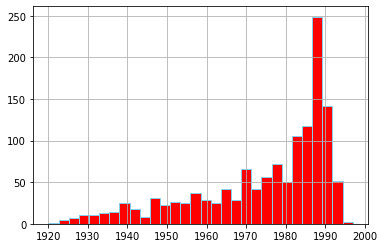

In [10]:
df['year'].hist(color = 'red', edgecolor = 'skyblue', bins = 30);

Посмотрим гистограмму частот и рассмотрим его, hist - строит гистограмму. Bins - выставляет нужное нам количество корзин, color and edgecolor работают с цветом

    Кто-то скажет что данное распределение даже примерно не похоже на нормальное. Я готов с этим поспорить, потому что в реалиях человечества мы не всегда можем рассчитывать на работу с генеральной совокупоностью. Здесь я вижу распределение которое с закрытыми глазами можно назвать псеевдо нормальным. Так что ограничивать мы будем, как разница между средним и теперешним годом по модулю. Логично подумать: Ну так если оно нормальное, то возбми моду и медиану и будут примерно одинаковые значения, но мы смотрим под другим углом поэтому подбираем более выгодный вариант для себя

    Ограничиваем же мы все по квадртаному корню чтобы немного уменьшить интервалы.

In [11]:
def check_len(df : pd.DataFrame):
    if len(df) == 0:
        return Exeption('Слишком маленькое число!')

    Функция для обработки ошибок - она нам понадобиться чтобы учитывать человеческий фактор при пользовании программой

In [12]:
def check_threw_directors(df : pd.DataFrame, producers : str):
    arr_producers = producers.split('@')
    df = df.loc[df['director'].isin(arr_producers)]
    return df

    Данная функция делает то, что мы уже видели - исходя из запросов пользователя по его режиссерам, выбирает для него лучшее. Все методы разъяснены выше.

In [13]:
def directorts(df : pd.DataFrame):
    data = df.groupby('director')['title'].agg(['count']).\
    sort_values('count', ascending = False).reset_index()
    return list(frozenset(data['director']))[:15]

    Данная функция выведет для пользователя 15 топовых режиссеров на данный момент. Вначале группируем по ним после чего делаем сортировку их количесто и выводим первые 15 строк.

In [14]:
def result_df(df : pd.DataFrame):
    titles = df['title'].tolist()
    actors = df['actor'].tolist()
    runtimes = df['runtime'].tolist()
    directors = df['director'].tolist()
    years = df['year'].tolist()
    for index in range(1, len(df) + 1):
        print(f'Произведеине номер {index})', end = '\n\t')
        print(f'Название {titles[index - 1]}', end = '\n\t')
        print(f'Гланвый актер - {actors[index - 1]}', end = '\n\t')
        print(f'Продолжительность картины : {runtimes[index - 1]}', end = '\n\t')
        print(f'Продюсер картины : {directors[index - 1]}', end = '\n\t')
        print(f'Год выпуска - {years[index - 1]}', end = '\n\t')
        print(f'Ссылка на произведение!')
        answer = titles[index - 1].replace(' ', '+')
        link = 'https://www.youtube.com/results?search_query=' + answer
        print(link)

    Функция финального вывода которая дает конечные рекомендации - ссылки даются на платформу YouTube для дальнейшего удобства использования

In [15]:
def main_func(df : pd.DataFrame, comand = '/start'):
    if comand == '/start':
        print('Вас приветствует чат бот фильмов! Давайте познакомимся! Меня зовут Антонио, а как тебя?')
        name = input('Введи пожалуйста свое имя: ')
        print(f'Приятно познаомиться {name} давай начнем выбирать тебе лучший фильм для твоего просмотра!', end = '\n\n')
        print('\n'.join(say_genres(df)), end = '\n\n')
        print('И так поехали! Я тебе вывел свои самые популярные жанры - выбери те которые тебе по душе!')
        print('Если хочешь изучить несколько жанров, то передай мне их через запятую!')
        print('Пример ввода жанров: Action,Comedy')
        while True:
            genre = input('Введи пожауйста жанр или жанры: ')
            if len(checklist_df(genre, df)) == 0:
                print('Скорее всего вы ввели неверные жанры! Перезапустите программу и передайте жанры через запятую')
            else:
                df = checklist_df(genre, df)
                break

        print()
        print('Соориентируй меня примерно по тому сколько ты хочешь чтобы шел фильм в Минутах!')
        minutes = int(input('Введи пожалуйста количество минут! - '))
        df = find_genre_with_minutes(df, minutes)
        check_len(df)
        print()
        print('Интересует ли тебя год выпуска фильма?', end = ' ')
        print('Если да, то введи примерно год в котором хотел бы видеть фильмы!', end = ' ')
        print('Если нет то введи : No')
        print('Напомиаем что у нас старые легенды! С 1920 по 2000!')
        year = input('Введите год : ')
        print()
        if year != 'No':
            df = categorize_by_year(df, year)
        print('Понимаем что продюсер играет тоже важную роль в картине!')
        print('Я верну вам список продюсеров!', end = '\n\n')
        print('\n'.join(directorts(df)), end = '\n\n')
        print('Если есть предпочтения то просто введите через знак @ , если нет то введите : No')
        print('Пример ввода продюсеров! Wicki, Bernhard@Panama, Norman', end = '')
        director = input('Введите продюсера/Продюсеров : ')
        if director != 'No':
             df = check_threw_directors(df, director)
        print()
        print('И так давайте оценим наш финальный резуьтат!')
        print('Я вам советую следующие картины для просмотра!', end = '\n\n')
        return result_df(df)

    Главная функция где по сути только пояснения к работе чат-бота

In [16]:
data = deepcopy(df)
main_func(data, '/start')

Вас приветствует чат бот фильмов! Давайте познакомимся! Меня зовут Антонио, а как тебя?
Введи пожалуйста свое имя: George
Приятно познаомиться George давай начнем выбирать тебе лучший фильм для твоего просмотра!

Comedy
Science Fiction
Western
Drama
Action
Mystery
Music
Horror

И так поехали! Я тебе вывел свои самые популярные жанры - выбери те которые тебе по душе!
Если хочешь изучить несколько жанров, то передай мне их через запятую!
Пример ввода жанров: Action,Comedy
Введи пожауйста жанр или жанры: Action,Horror

Соориентируй меня примерно по тому сколько ты хочешь чтобы шел фильм в Минутах!
Введи пожалуйста количество минут! - 60

Интересует ли тебя год выпуска фильма? Если да, то введи примерно год в котором хотел бы видеть фильмы! Если нет то введи : No
Напомиаем что у нас старые легенды! С 1920 по 2000!
Введите год : 1960

Понимаем что продюсер играет тоже важную роль в картине!
Я верну вам список продюсеров!

Dwan, Allan
Kurosawa, Akira
Thorpe, Richard
Corman, Roger
Hitchcock, 